# Práctica EDA: Space Missions
## Nombre: Joaquín Samuel González Beizaga

Título: Análisis Exploratorio de Datos (EDA) en un Conjunto de Datos de Misiones Espaciales (https://www.kaggle.com/code/berkemk/space-missions-eda/notebook).

Objetivo: Este trabajo tiene como objetivo realizar un Análisis Exploratorio de Datos (EDA) en un conjunto de datos que contiene información sobre misiones espaciales, con el fin de obtener información valiosa sobre las tendencias, participantes y éxito de estas misiones.

Tiempo estimado: 3 horas


### Parte 1: Introducción (30 minutos)
1.-	Contextualización del Problema:
* Introducción a la importancia de las misiones espaciales y la relevancia del análisis exploratorio de datos en este campo.

2.-	Descripción del Conjunto de Datos:
* Enumerar las variables presentes en el conjunto de datos de misiones espaciales.
* Explicar la fuente de los datos, su alcance y cualquier proceso previo de limpieza.


### Solución Parte 1: Introducción
1.-	Contextualización del Problema:

Las misiones espaciales son de vital importancia para el objetivo mundial de realizar exploraciones en el universo. Desde los primeros vuelos orbitales hasta las complejas misiones interplanetarias, el estudio del espacio exterior ha sido crucial para comprender nuestra propia existencia, así como para desarrollar tecnologías que impactan nuestras vidas diarias.

Ahora bien, el análisis exploratorio de datos es de suma importancia para las misiones espaciales. Debido a que permite tener una mejor comprensión de la información recopilada durante las misiones, ofreciendo un mejor manejo y entendimiento de las grandes cantidades de datos que se pueden extraer de las misiones. El EDA permite identificar patrones, anomalías y tendencias en estos datos, lo que a su vez contribuye a mejorar la planificación y ejecución de futuras misiones, así como a profundizar nuestra comprensión del universo.

2.-	Descripción del Conjunto de Datos:

Para realizar la descripción del dataset, primero lo cargamos en nuestro cuaderno de trabajo. Con la ayuda de la librería Pandas para leer el csv del data set y aprovechar de su versatilidad en el manejo de datos para extraer la información solicitada.

In [328]:
import pandas as pd

df = pd.read_csv('Space_Corrected.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [329]:
df.shape

(4324, 9)

Las variables que tenemos en el dataset son las siguientes:

1. Unnamed 0.1 y Unnamed 0: Solo indica los índices de los datos. (Será eliminada posteriormente. Ya que al tener el conjunto de datos dentro del DataFrame "df" los datos ya cuentan con un índice)
2. Unnamed 0: Caso similar al anterior.
3. Company Name: Indica el nombre de la compañía que realizó el lanzamiento de la misión espacial.
4. Location: Indica la ubicación del lanzamiento.
5. Datum: Indica la fecha y hora del lanzamiento.
6. Detail: Indica el nombre del cohete.
7. Status Rocket: Indica el estado del cohete.
8. Rocket: Indica el costo de la misión en millones de dólares.
9. Status Mission: Indica si la misión tuvo éxito o fracasó.

Por lo tanto, inicialmente tenemos 4324 filas de datos registrados y unas 9 variables, pero al tener dos primeras columnas que solo indican el índice de los datos y las vamos a eliminar, en realidad estaríamos empezando con 7 variables (1 variable dependiente y 6 variables independientes).

Los datos fueron extraídos de las diferentes misiones espaciales llevadas a cabo por diferentes compañías en diferentes países del mundo.

In [330]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [331]:
eliminar = ['Unnamed: 0.1', 'Unnamed: 0']
df = df.drop(columns = eliminar)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### Parte 2: Exploración de Datos (1 hora)
3.-	Estadísticas Descriptivas:
* Calcular estadísticas descriptivas como la cantidad total de misiones, promedio de éxito, distribución de lanzamientos por año, etc.
* Identificar y manejar posibles valores faltantes.

4.-	Visualizaciones Temporales:
* Crear gráficos temporales que muestren la evolución de las misiones espaciales a lo largo del tiempo.
* Identificar picos de actividad y períodos de baja actividad.


### Solución Parte 2: Exploración de Datos
3.-	Estadísticas Descriptivas:

Para realizar las estadísticas descriptivas aprovechamos las herramientas de manejo de datos que nos brinda la librería Pandas.

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


Observamos que tenemos 3360 datos faltantes en la columna Rocket que indica el costo de las misiones.

Por lo tanto, crearemos un DataFrame que tenga únicamente los registros que si tienen la información de los costos para analizarlos por separado.


In [333]:
df_costos = df[[' Rocket']].dropna()
df_costos

,Rocket
0,50.0
1,29.75
3,65.0
4,145.0
5,64.68
...,...
3855,59.0
3971,63.23
3993,63.23
4000,63.23


In [334]:
df_costos.shape

(964, 1)

In [335]:
df_costos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    Rocket  964 non-null    object
dtypes: object(1)
memory usage: 15.1+ KB


In [336]:
df_costos[' Rocket'].unique()

array(['50.0 ', '29.75 ', '65.0 ', '145.0 ', '64.68 ', '48.5 ', '90.0 ',
       '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ', '12.0 ',
       '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ', '41.8 ',
       '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ', '350.0 ',
       '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ', '123.0 ',
       '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ', '140.0 ',
       '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ', '190.0 ',
       '135.0 ', '20.0 ', '136.6 ', '5,000.0 ', '1,160.0 ', '59.0 ',
       '63.23 '], dtype=object)

In [337]:
df_costos[' Rocket'] = df_costos[' Rocket'].str.replace(',','').astype(float)
df_costos[' Rocket'].unique()

array([  50.  ,   29.75,   65.  ,  145.  ,   64.68,   48.5 ,   90.  ,
         46.  ,   28.3 ,   29.15,    7.5 ,   30.8 ,    5.3 ,   12.  ,
        112.5 ,  120.  ,  153.  ,  200.  ,   85.  ,  115.  ,   41.8 ,
         21.  ,   31.  ,   40.  ,  164.  ,   62.  ,   37.  ,  350.  ,
         39.  ,   47.  ,   35.  ,   69.7 ,  109.  ,   45.  ,  123.  ,
        130.  ,   25.  ,   56.5 ,   15.  ,   29.  ,   80.  ,  140.  ,
         55.  ,   59.5 ,  450.  ,    7.  ,   20.14,  133.  ,  190.  ,
        135.  ,   20.  ,  136.6 , 5000.  , 1160.  ,   59.  ,   63.23])

In [338]:
df_costos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    Rocket  964 non-null    float64
dtypes: float64(1)
memory usage: 15.1 KB


In [339]:
df_costos.describe()

,Rocket
count,964.000000
mean,153.792199
std,288.450732
min,5.300000
25%,40.000000
50%,62.000000
75%,164.000000
max,5000.000000


Ahora si podemos observar claramente los datos de los costos de las misiones que tenemos disponibles.

Observamos que el costo promedio por lanzamiento, según los datos que tenemos (que representan aproximadamente la quinta parte del dataset), es aproximadamente 153.8 millones de dólares, con una desviación estándar de 288.45 millones de dólares. 

Sin embargo, los datos parecen estar muy sesgados. Por lo cual consideremos que un valor más representativo para los vuelos sería un equivalente a la mediana de los datos, con un valor de 62 millones de dólares.

Para confirmar esta información podemos hacer uso de herramientas de visualización de datos, como se presenta a continuación.

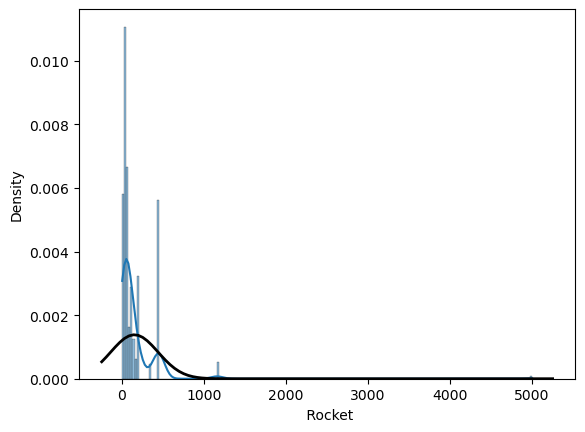

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

#Vizualisamos la distribución de los costos.
sns.histplot(df_costos[' Rocket'], kde=True, stat='density')

#Realizamos una gráfica de distribución normal para los costos.
mu, std = stats.norm.fit(df_costos[' Rocket'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

Claramente observamos que el costo de 5000 millones de dólares influye bastante en el costo representativo de las misiones al incrementar significativamente el valor de su media.

Analicemos más de cerca la zona donde existe una mayor concentración de los datos.

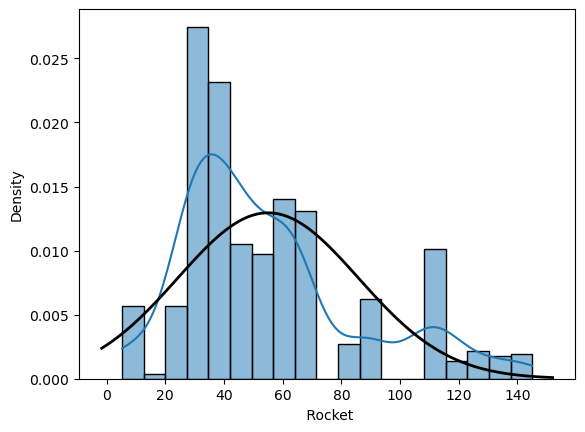

In [341]:
df_filtrado = df_costos[(df_costos[' Rocket'] >= 0) & (df_costos[' Rocket'] <= 150)]


# Vizualizar la distribución de los costos dentro del intervalo de 0 a 150.
sns.histplot(df_filtrado[' Rocket'], kde=True, stat='density')

# Realizar una gráfica de distribución normal para los costos dentro del intervalo de 0 a 150.
mu, std = stats.norm.fit(df_filtrado[' Rocket'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


In [342]:
df_filtrado.describe()

,Rocket
count,698.000000
mean,55.032493
std,30.827095
min,5.300000
25%,30.800000
50%,48.500000
75%,64.680000
max,145.000000


In [343]:
df_prueba = df.loc[df[' Rocket'] == '5,000.0 ']
df_prueba

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.0",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.0",Success


In [344]:
df_prueba = df.loc[df[' Rocket'] == '5.3 ']
df_prueba

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
26,CASC,"Xichang Satellite Launch Center, China","Fri May 29, 2020 20:13 UTC",Long March 11 | XJS-G and XJS-H,StatusActive,5.3,Success
102,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Sep 19, 2019 06:42 UTC",Long March 11 | Zhuhai-1 Group 03,StatusActive,5.3,Success
133,CASC,"Tai Rui Barge, Yellow Sea","Wed Jun 05, 2019 04:06 UTC",Long March 11H | Jilin-1 & Others,StatusActive,5.3,Success
166,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Mon Jan 21, 2019 05:42 UTC",Long March 11 | Jilin-1 Hyperspectral & Others,StatusActive,5.3,Success
176,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Dec 21, 2018 23:51 UTC",Long March 11 | Hongyun-1,StatusActive,5.3,Success
249,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Apr 26, 2018 04:42 UTC",Long March 11 | Zhuhai-1 2A to 2D,StatusActive,5.3,Success
281,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jan 19, 2018 04:12 UTC","Long March 11 | Jilin-1 07, 08 & Others",StatusActive,5.3,Success
399,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Wed Nov 09, 2016 23:42 UTC","Long March 11 | XPNAV 1, Xiaoxiang 1 & Others",StatusActive,5.3,Success
487,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Sep 25, 2015",Long March 11 | Pujian 1 & Others,StatusActive,5.3,Success


Con esta visualización podemos validar que el valor de 62 millones de dólares, mencionados anteriormente, sí ofrecían una mejor representación del conjunto de datos que se concentran dentro de esta zona, la cual hemos delimitado como de 0 a 150 millones de dólares.

En conclusión tenemos que un valor representativo para las misiones espaciales es de aproximadamente 62 millones de dólares, con un valor mínimo de 5.3 millones de dólares (correspondientes a la compañía CASC de China) y un valor máximo de 5000 millones de dólares (correspondientes a la compañía RVSN USSR de Rusia).


Ahora analizamos las demás variables, tomando en cuenta su variación temporal.

Preparamos el dataset original para analizarlo.

In [345]:
df[' Rocket'] = df[' Rocket'].str.replace(',','').astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Datum           4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Status Rocket   4324 non-null   object 
 5    Rocket         964 non-null    float64
 6   Status Mission  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [346]:
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')

In [347]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


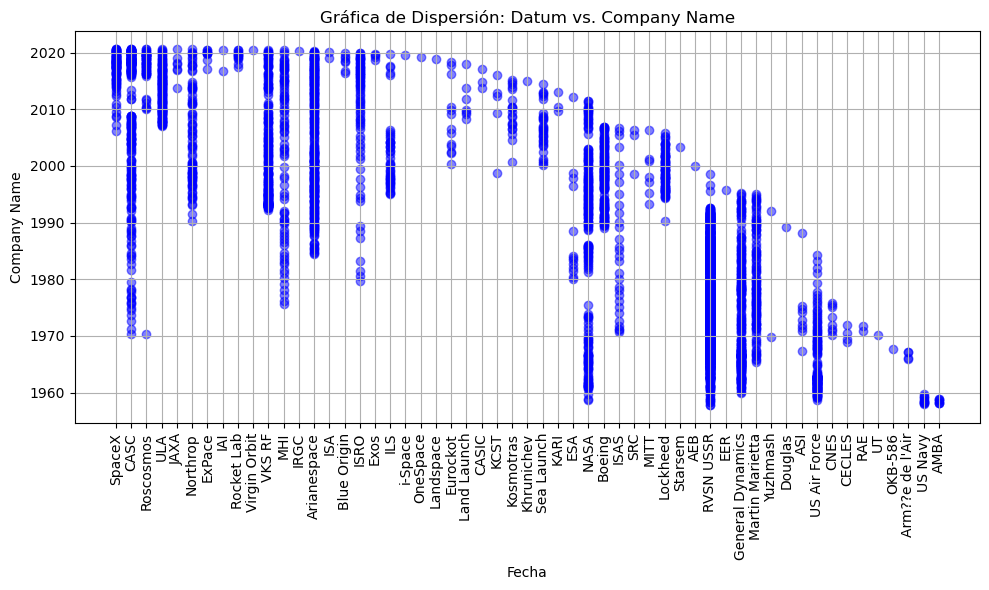

In [348]:
# Eliminamos las filas con NaT en la columna 'Datum', solo para fines de visualización
df_cleaned = df.dropna(subset=['Datum'])

# Creamos la gráfica de dispersión para la variable 'Company Name'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Company Name'], df_cleaned['Datum'], color='blue', alpha=0.5)

plt.title('Gráfica de Dispersión: Datum vs. Company Name')
plt.xlabel('Fecha')
plt.ylabel('Company Name')

plt.xticks(rotation=90)

plt.grid(True)
plt.tight_layout()

plt.show()


De esta gráfica podemos observar fácilmente que la compañía CASC, de China, y la NASA, de EE.UU., son las que han durado más tiempo en el rubro de las misiones espaciales.

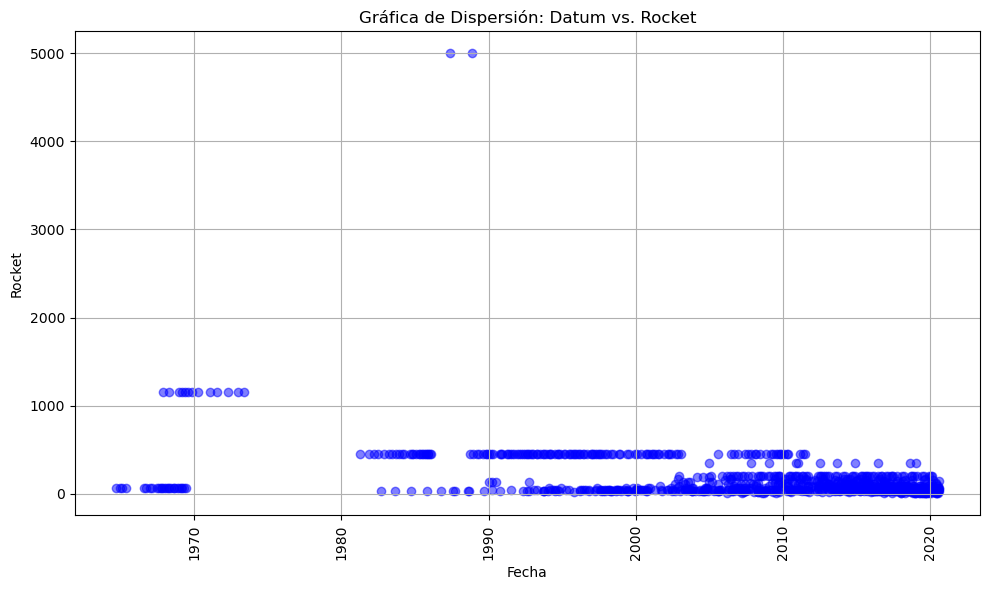

In [349]:
# Creamos la gráfica de dispersión para la variable ' Rocket'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Datum'], df_cleaned[' Rocket'], color='blue', alpha=0.5)

plt.title('Gráfica de Dispersión: Datum vs. Rocket')
plt.xlabel('Fecha')
plt.ylabel('Rocket')

plt.xticks(rotation=90)

plt.grid(True)
plt.tight_layout()

plt.show()

De esta gráfica podemos observar que en los 70's las misiones espaciales tenían un costo promedio superior a los 1000 millones de dólares, en los 80's y 90's estos costos fueron disminuyendo a cerca de 500 millones de dólares. Finalmente, ya después de 2010 el costo de las misiones espaciales se fue consolidando por debajo de los 400 millones de dólares. Lo cual indica un evidente avance tecnológico en las misiones espaciales, que con el pasar del tiempo han podido disminuir sus costos gracias a la tecnología que va evolucionando con el pasar de los años.

Además, podemos observar claramente que la temporada de menor actividad, en cuanto a misiones espaciales, fue durante los 70's.
Mientras que los periodos donde hubo una mayor actividad por parte de las compañías fue apartir del año 2000 en adelante.


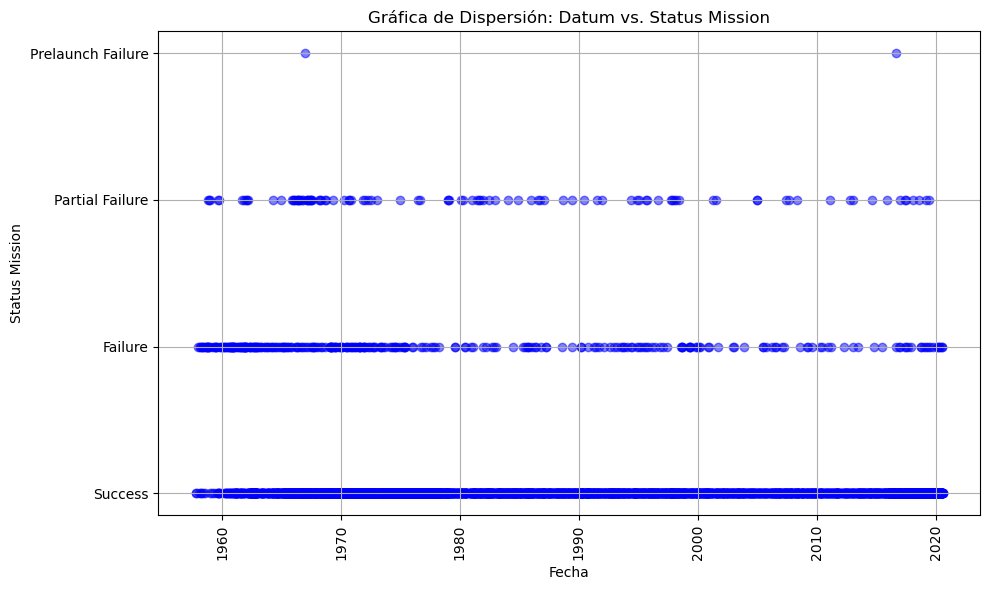

In [350]:
# Creamos la gráfica de dispersión para la variable 'Status Mission'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Datum'], df_cleaned['Status Mission'], color='blue', alpha=0.5)

plt.title('Gráfica de Dispersión: Datum vs. Status Mission')
plt.xlabel('Fecha')
plt.ylabel('Status Mission')

plt.xticks(rotation=90)

plt.grid(True)
plt.tight_layout()

plt.show()

En esta gráfica podemos observar que desde los 80's en adelante, ha habido una disminución significativa en las misiones espaciales fallidas en comparación con años anteriores.

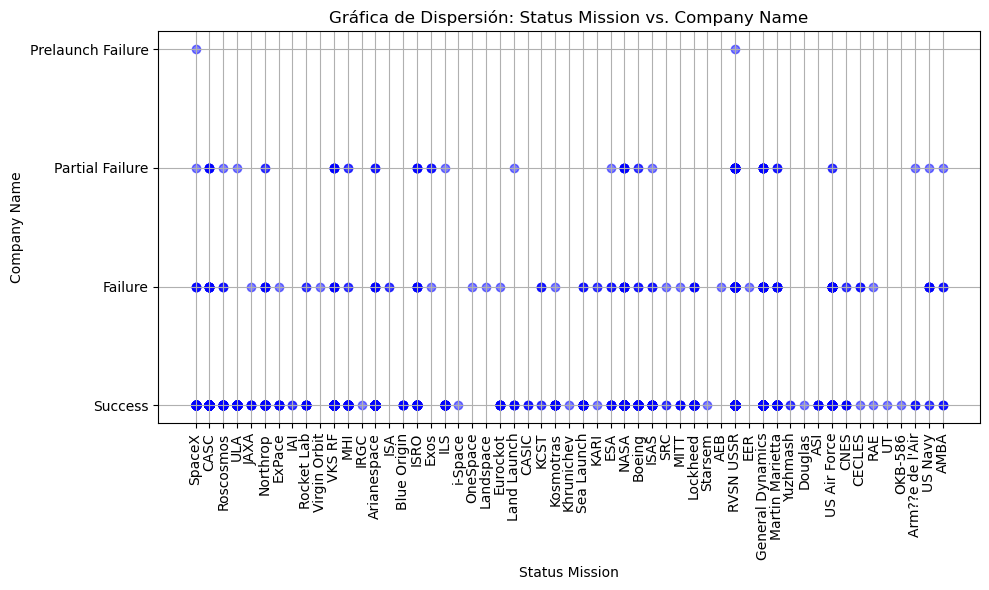

In [351]:
# Creamos la gráfica de dispersión para la variable 'Company Name'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Company Name'], df_cleaned['Status Mission'], color='blue', alpha=0.5)

plt.title('Gráfica de Dispersión: Status Mission vs. Company Name')
plt.xlabel('Status Mission')
plt.ylabel('Company Name')

plt.xticks(rotation=90)

plt.grid(True)
plt.tight_layout()

plt.show()

En esta gráfica no podemos observar claramente el rendimiento de las compañías las diferentes misiones espaciales que llevaron a cabo.

Por lo cual, realizaremos unas gráficas de barras para cada compañía con el fin de tener una herramienta de facilite la visualización del rendimiento de cada compañía.


In [352]:
df['Company Name'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

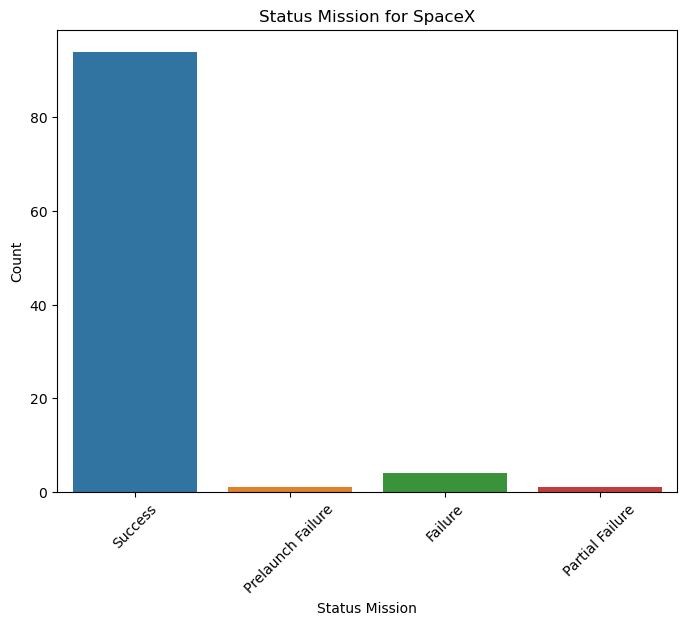

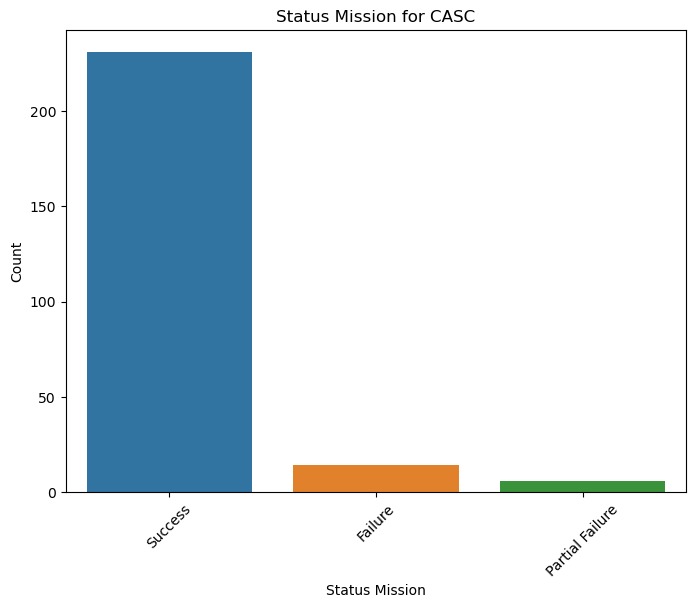

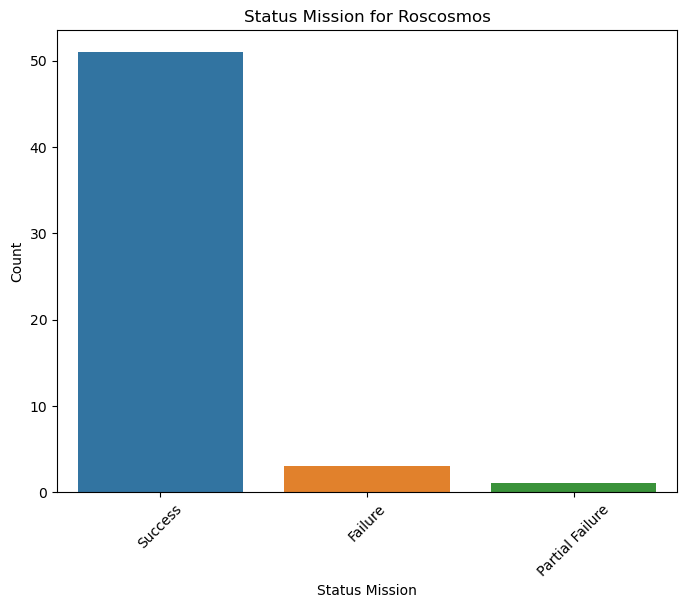

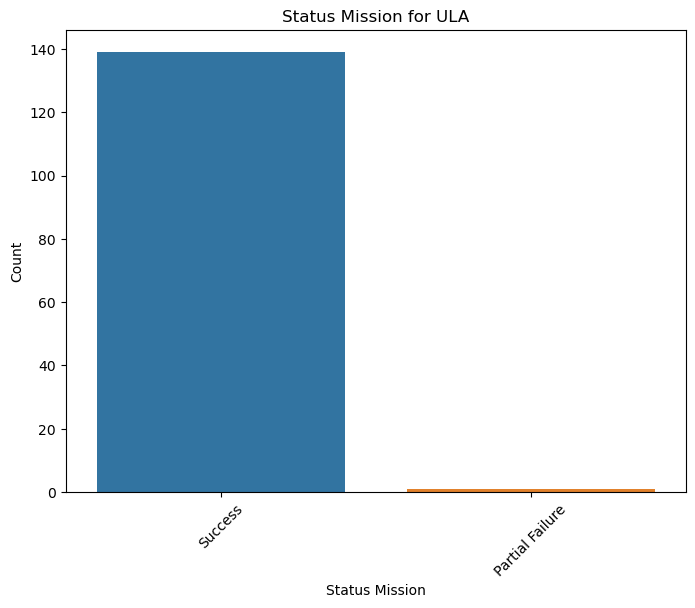

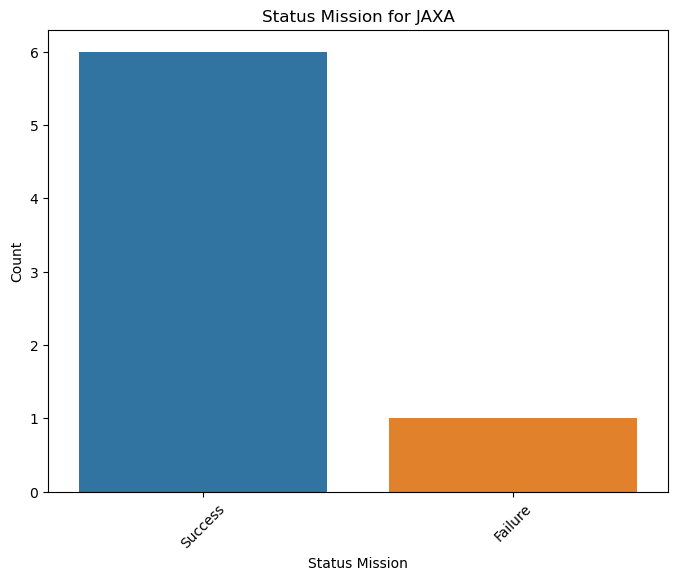

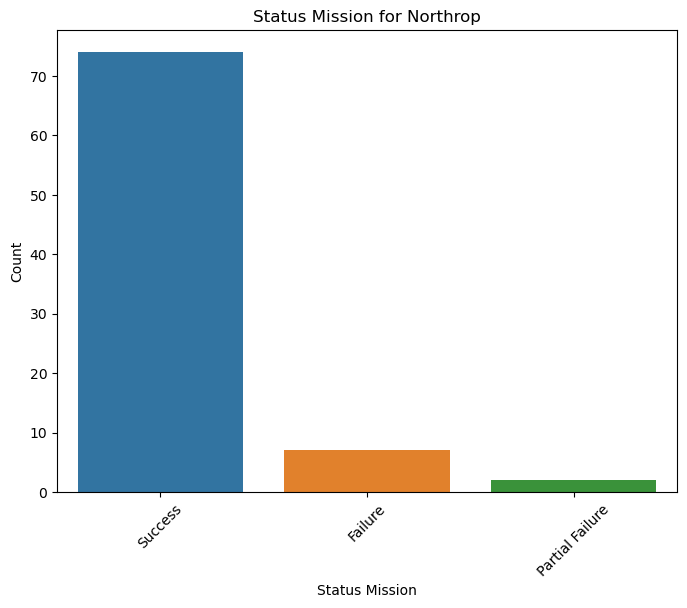

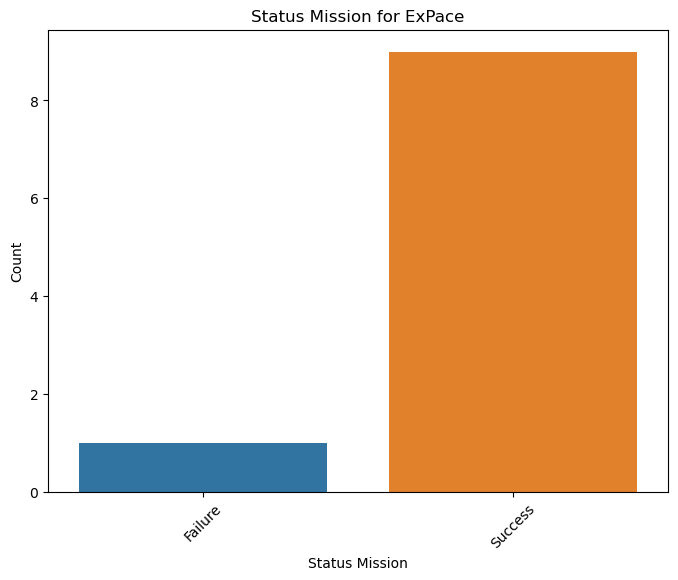

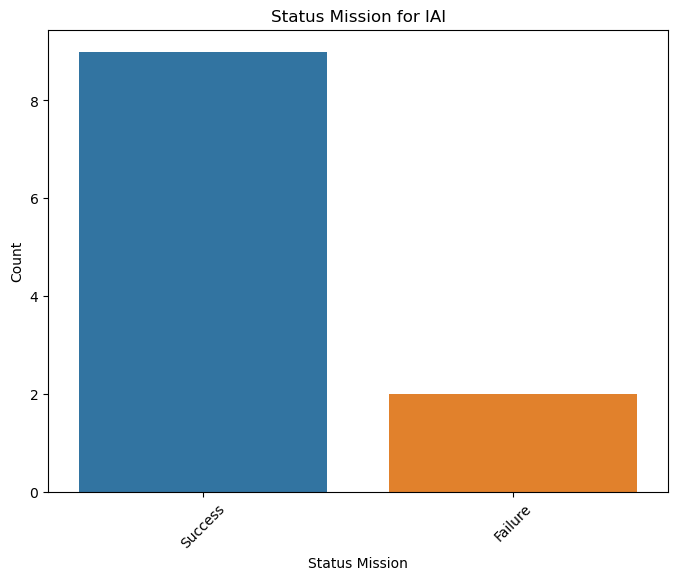

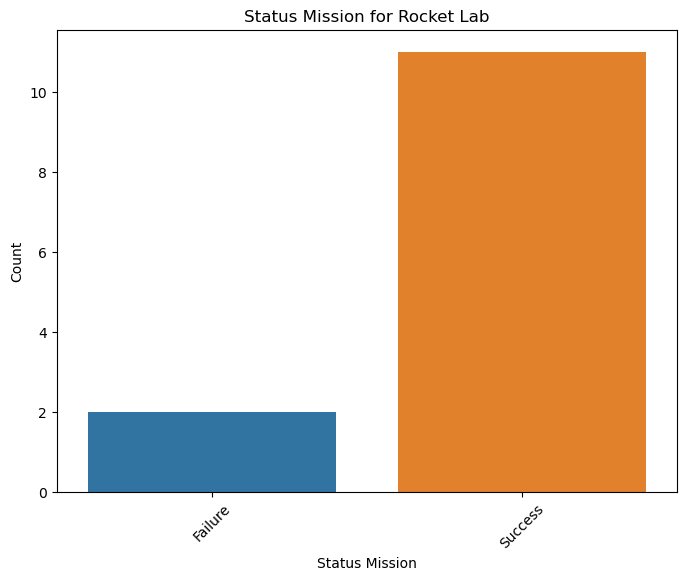

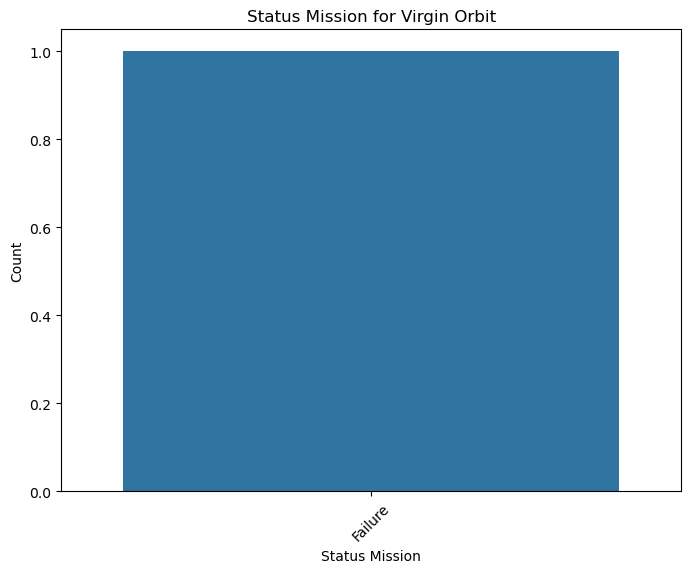

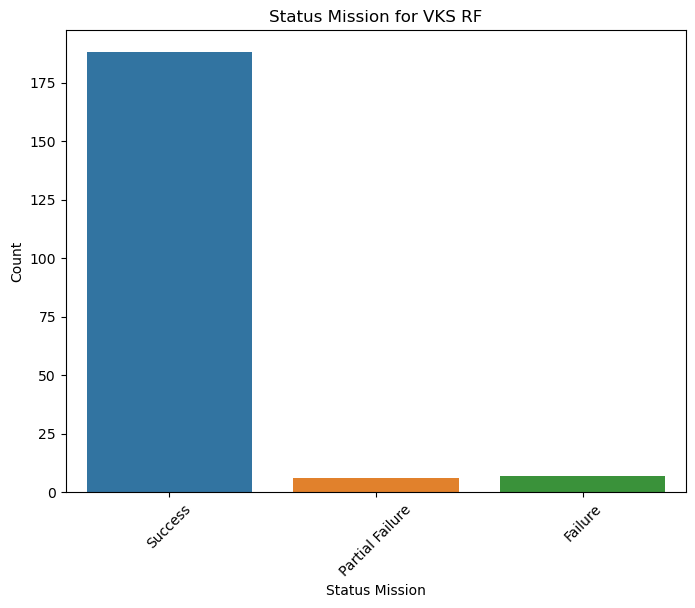

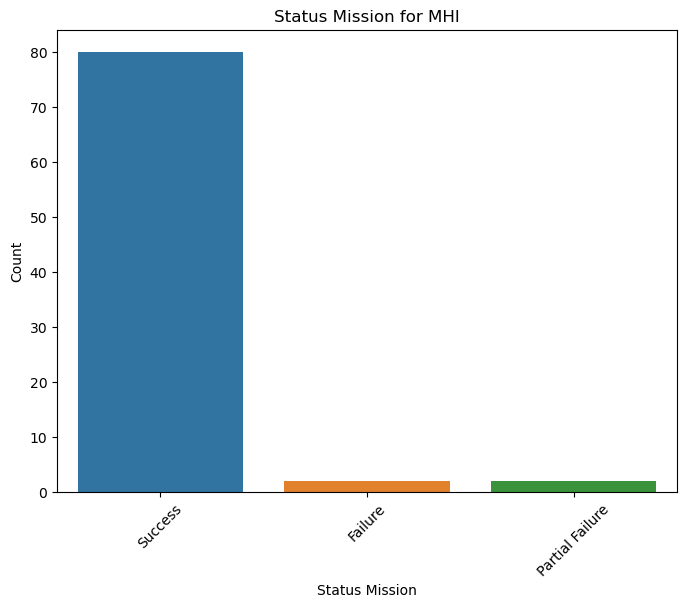

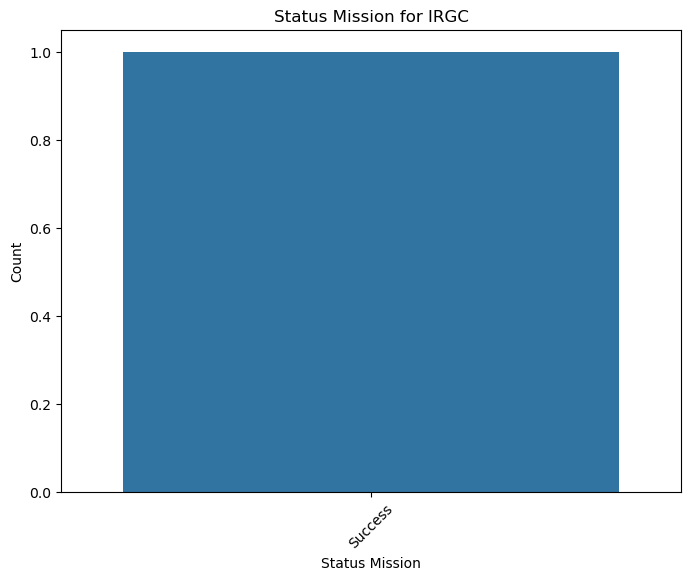

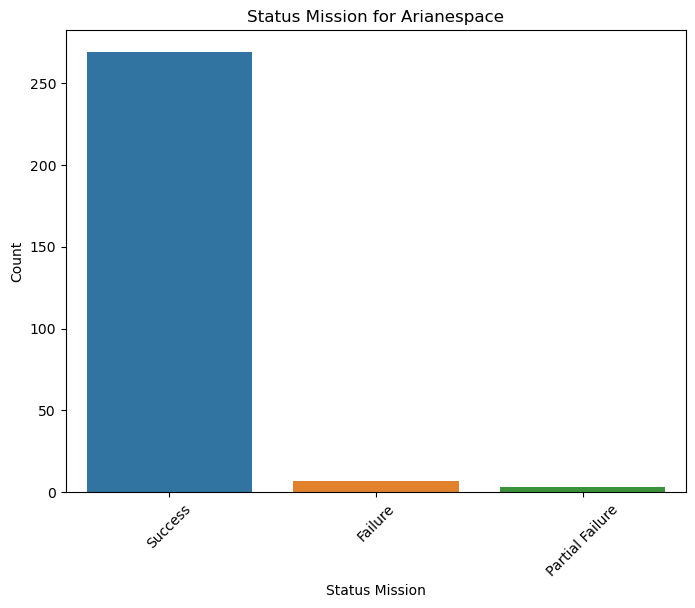

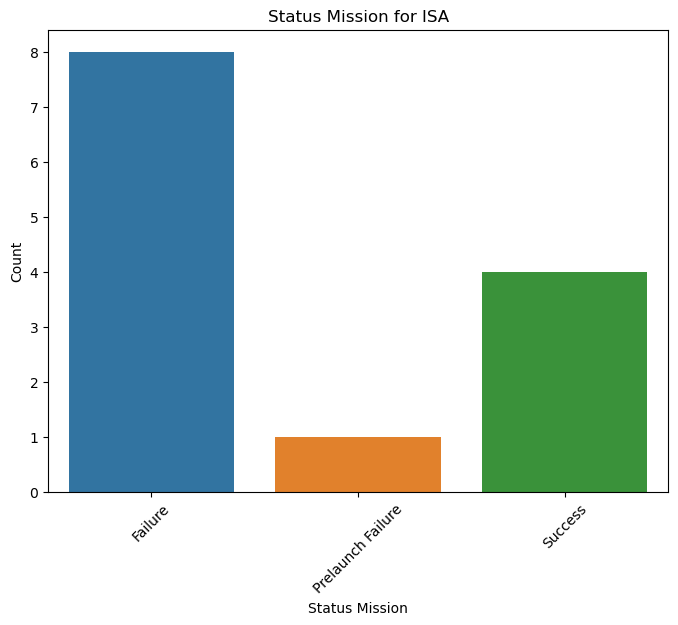

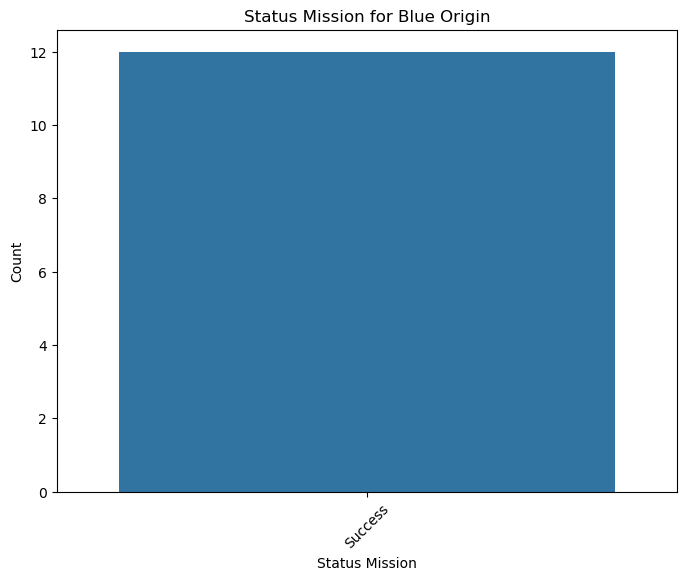

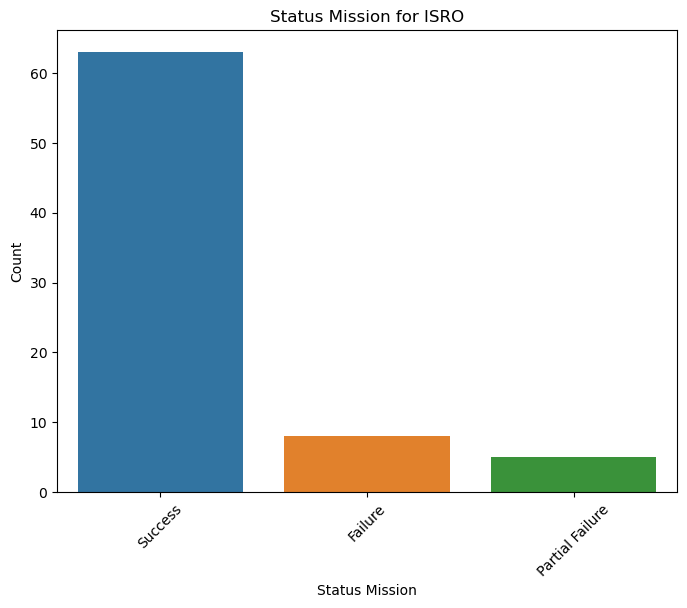

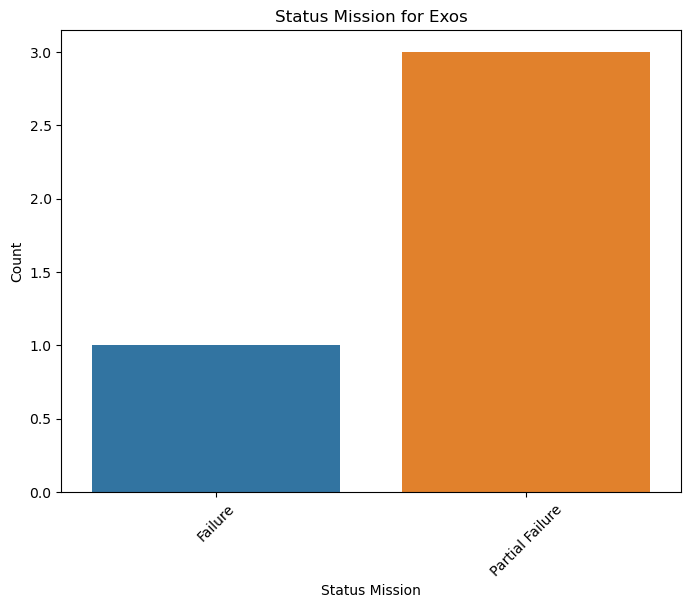

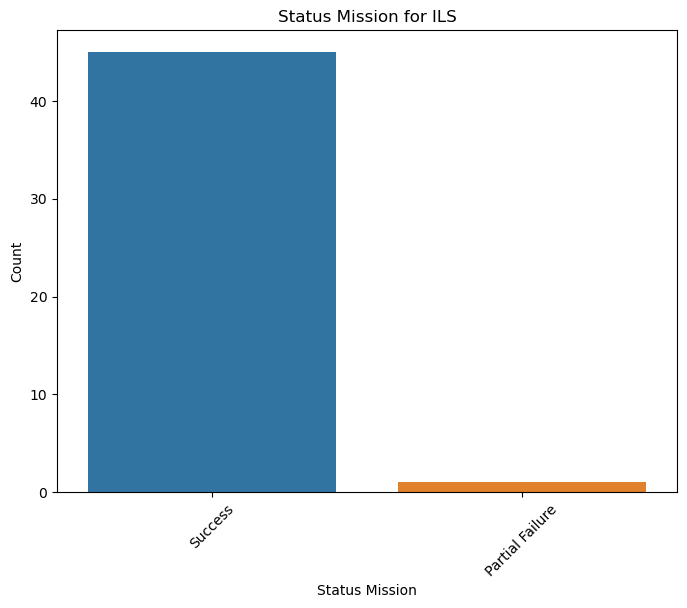

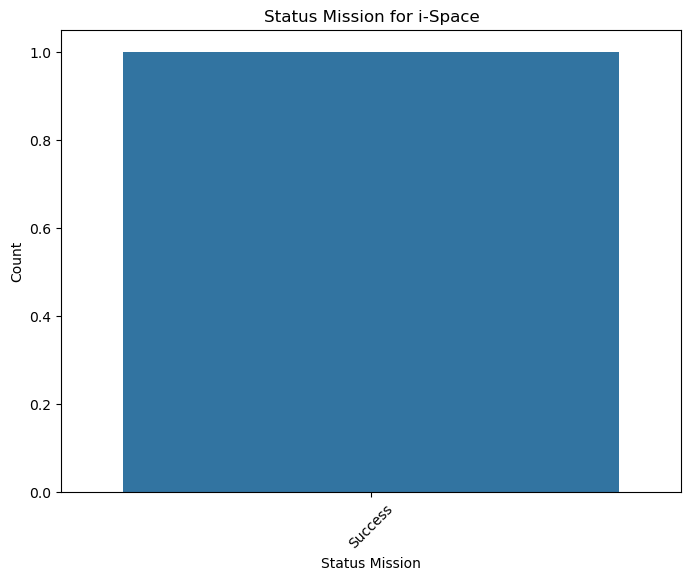

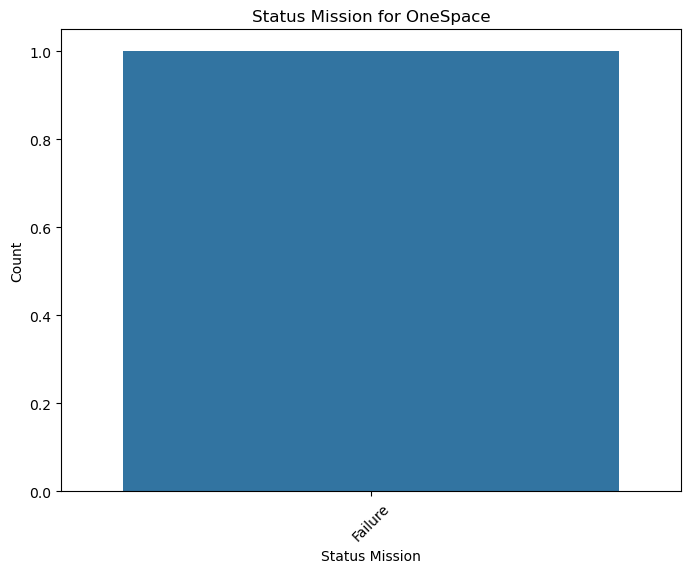

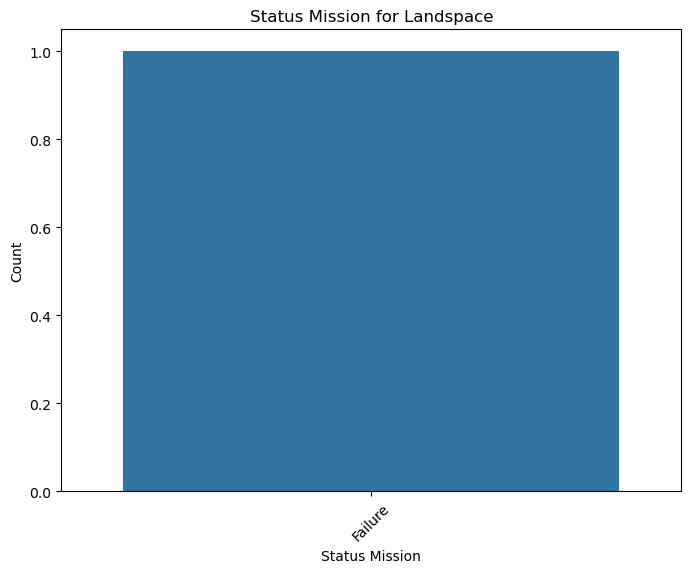

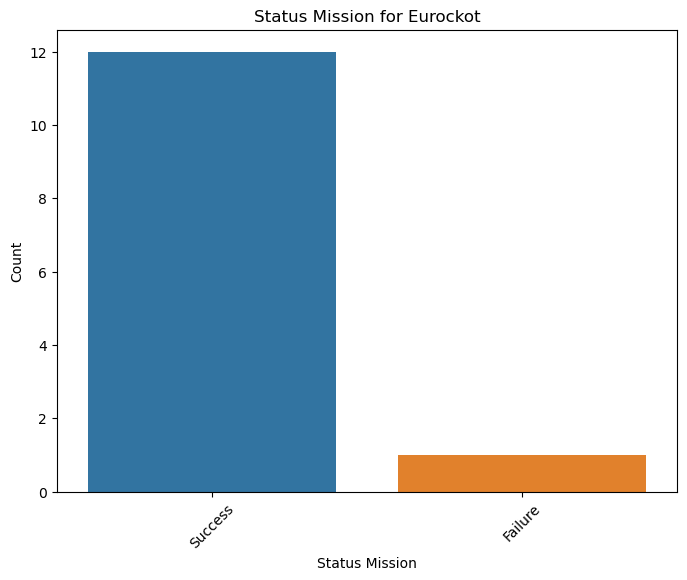

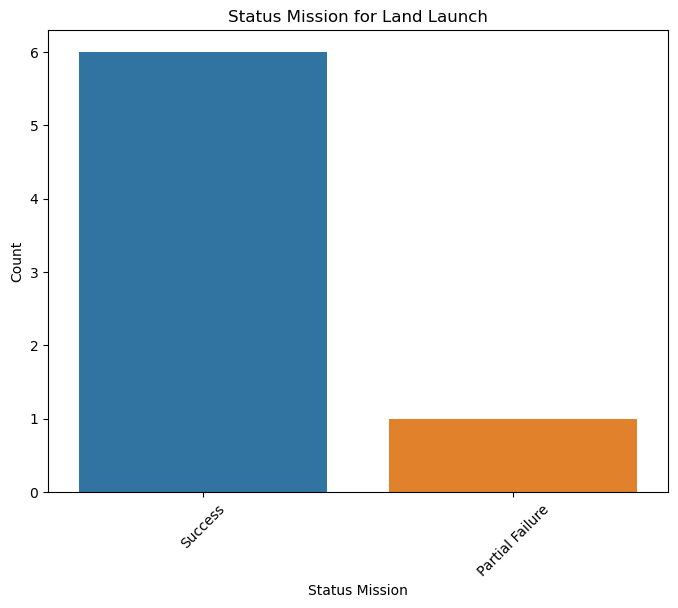

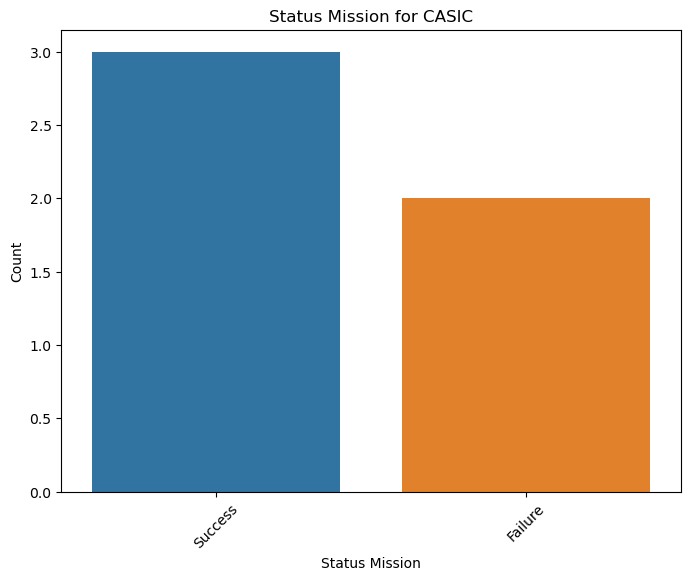

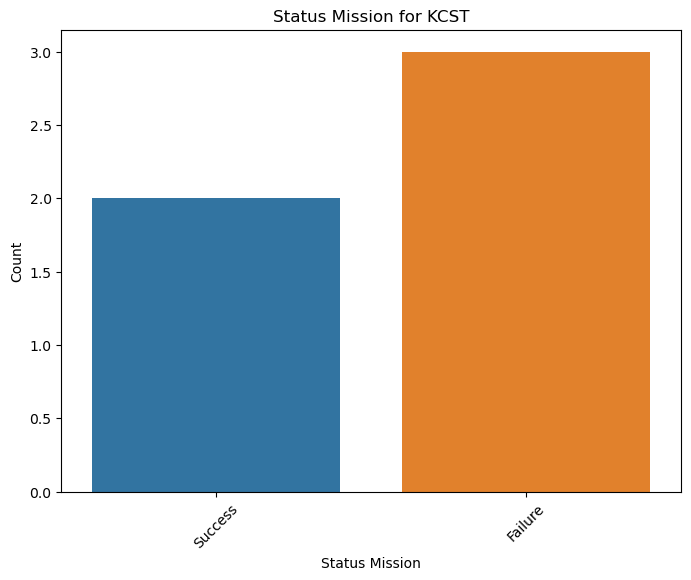

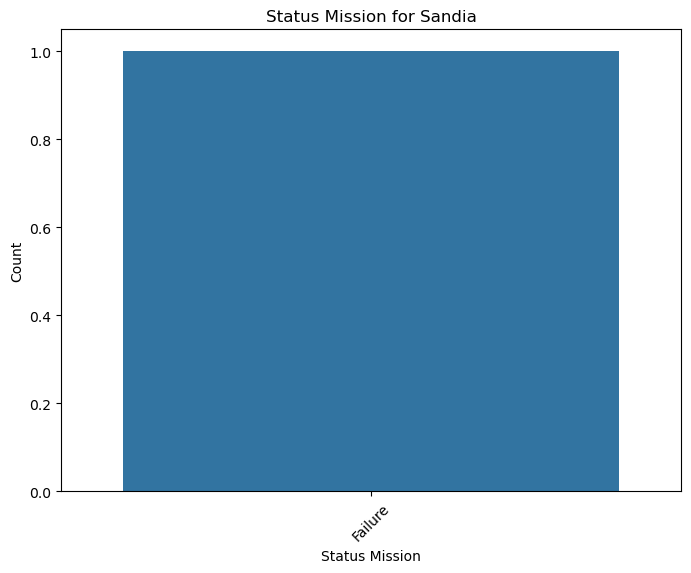

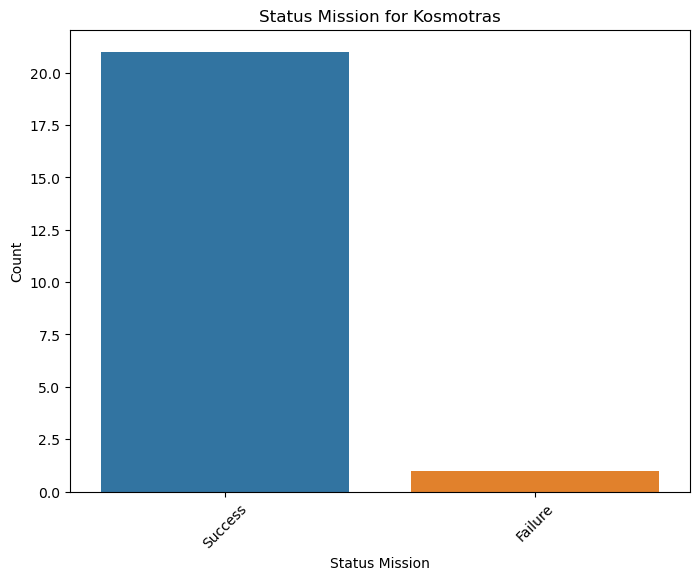

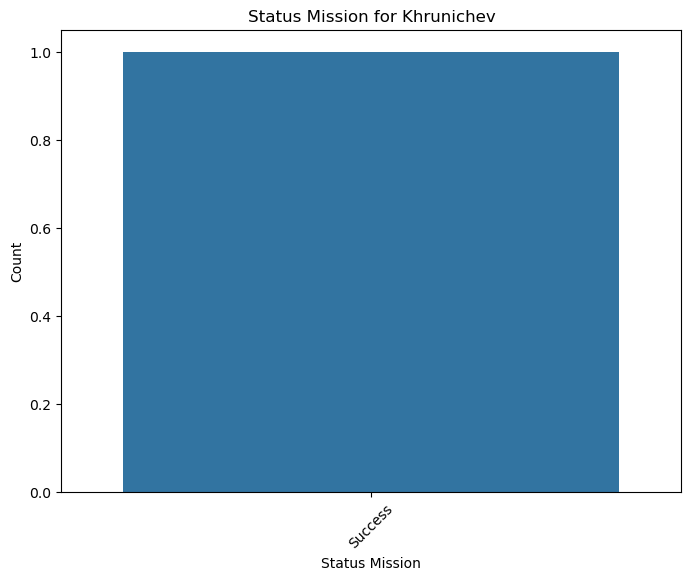

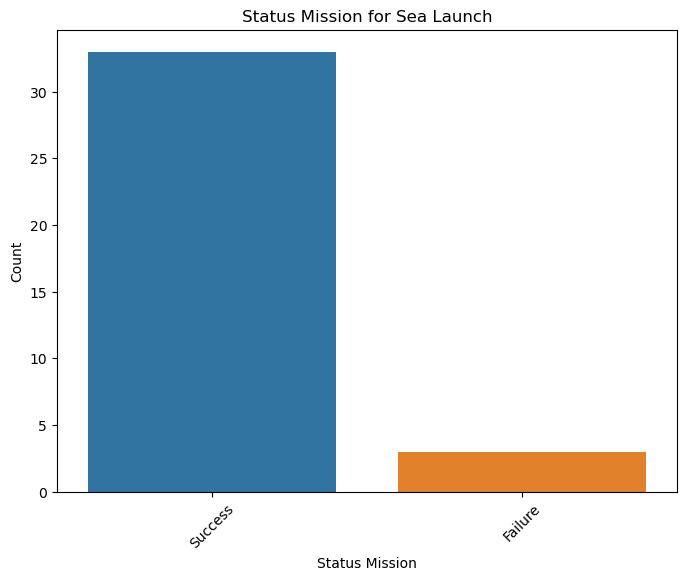

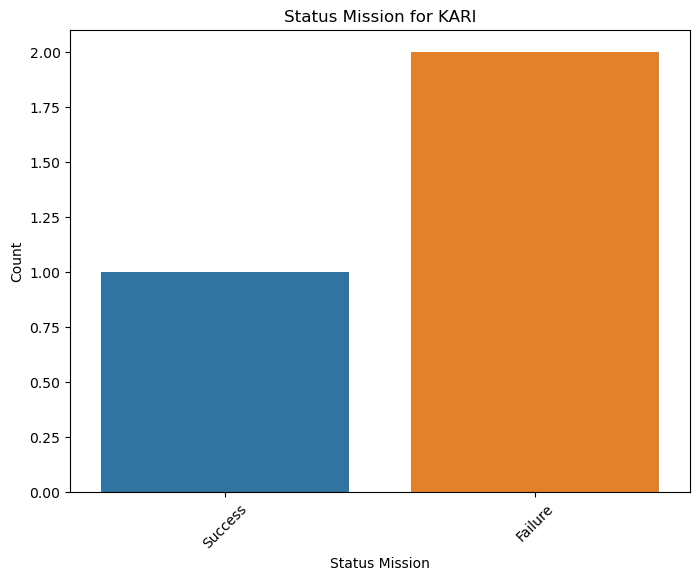

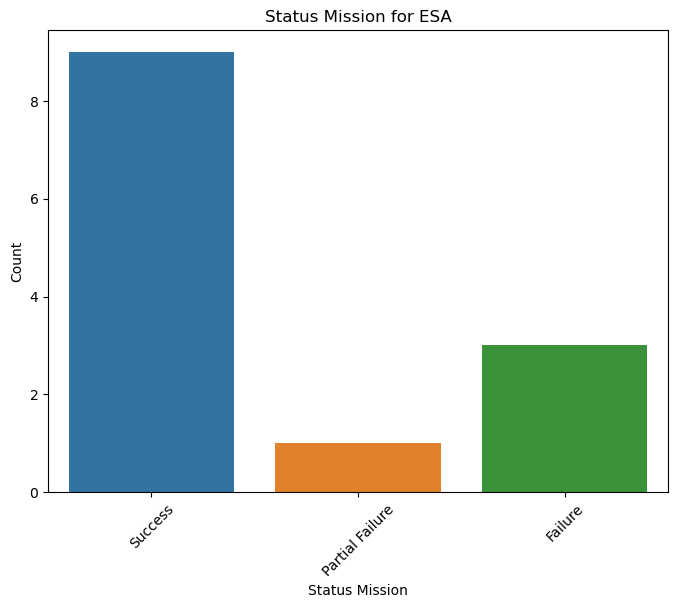

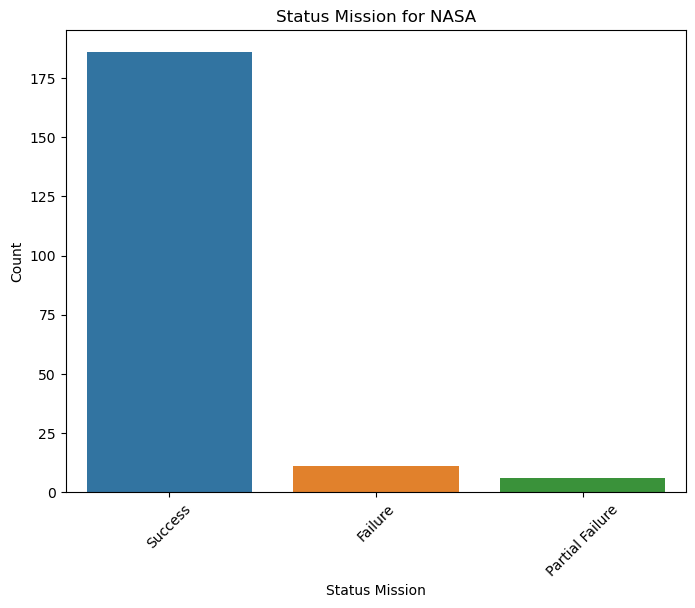

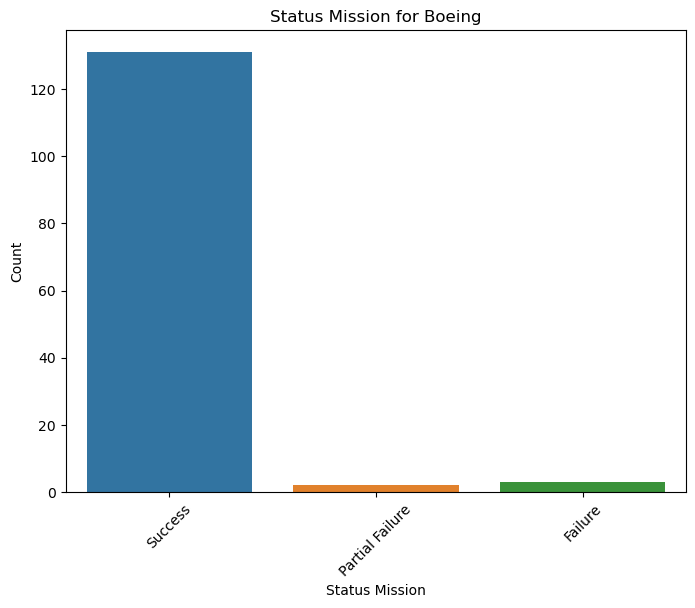

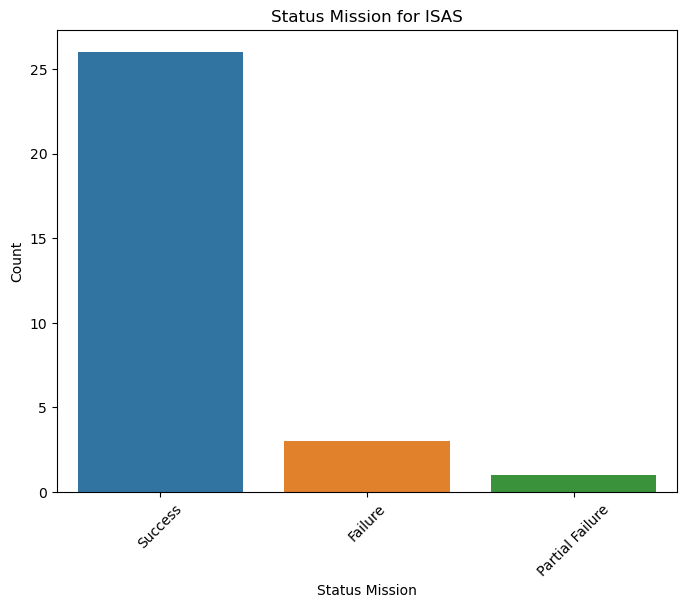

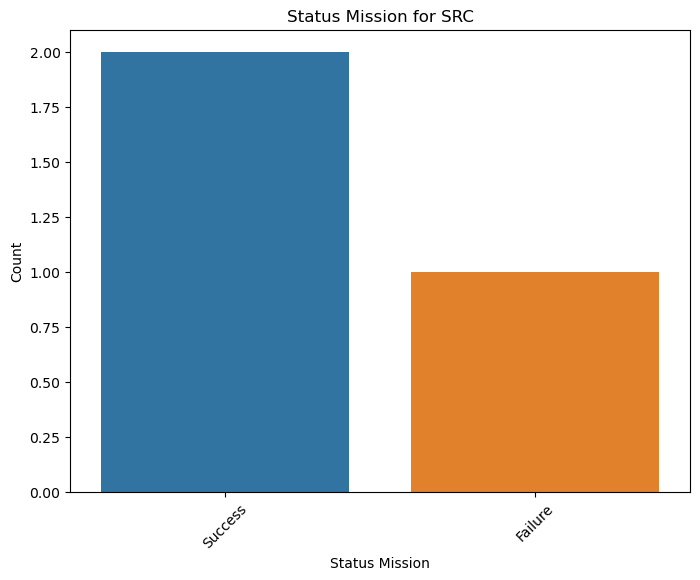

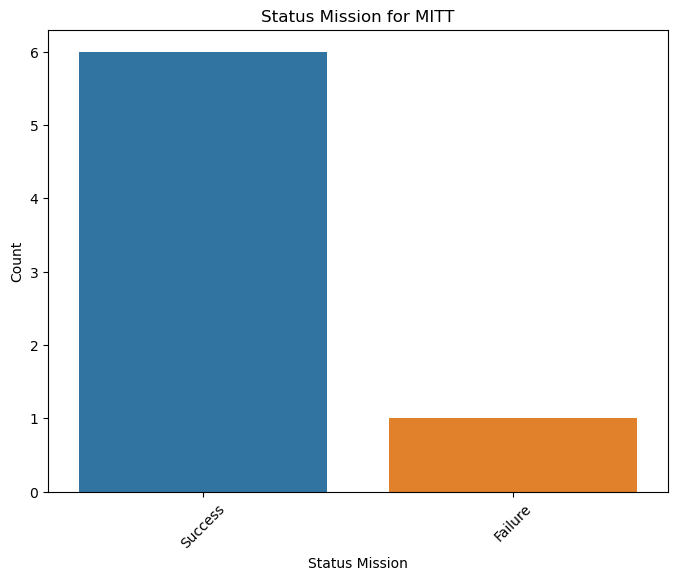

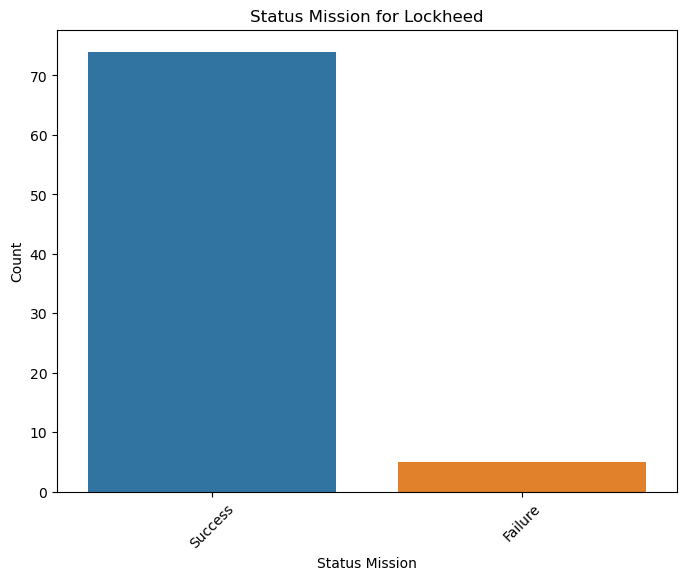

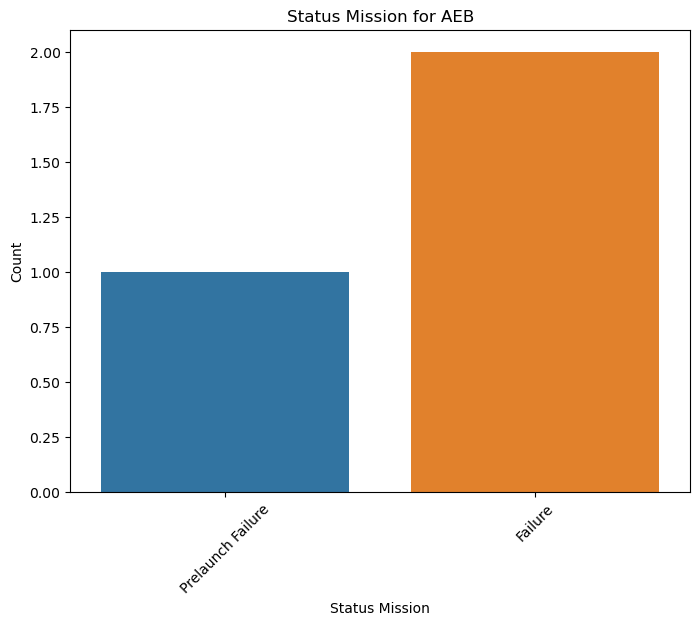

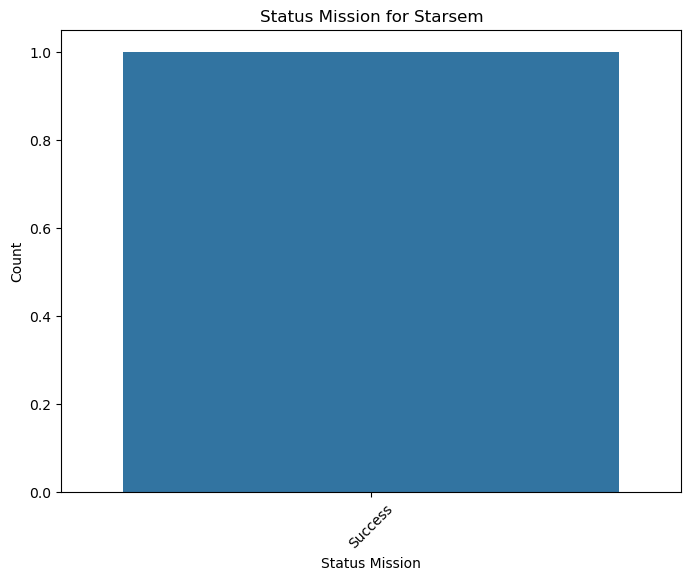

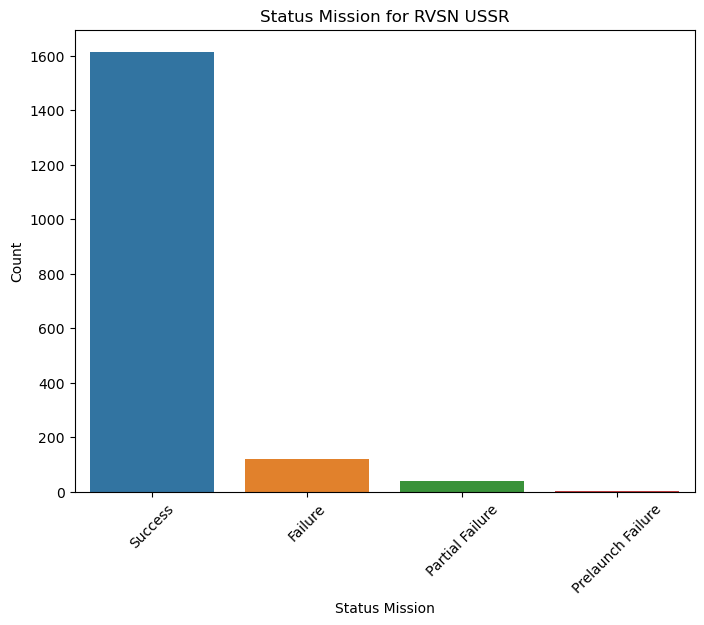

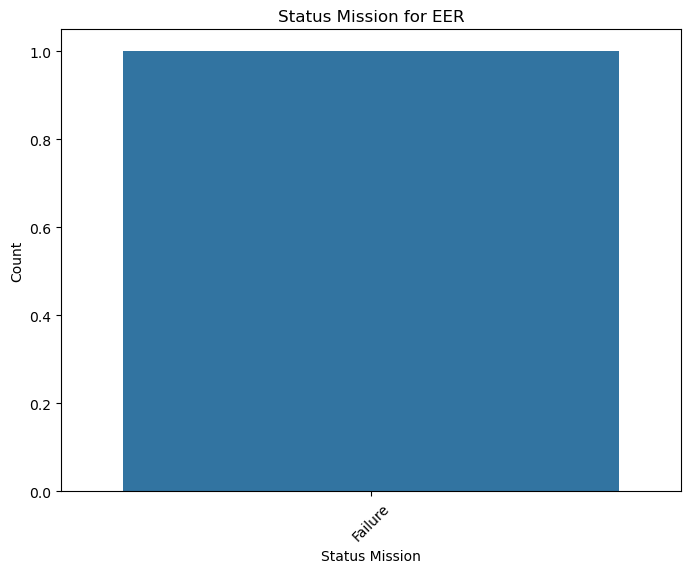

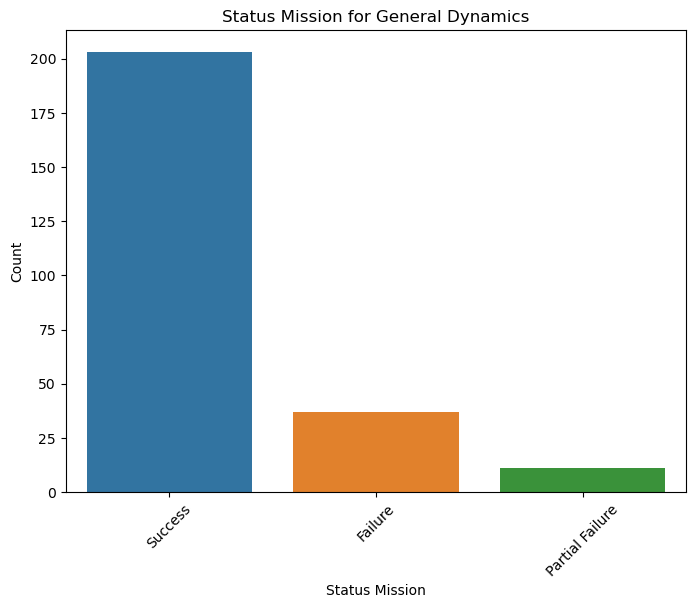

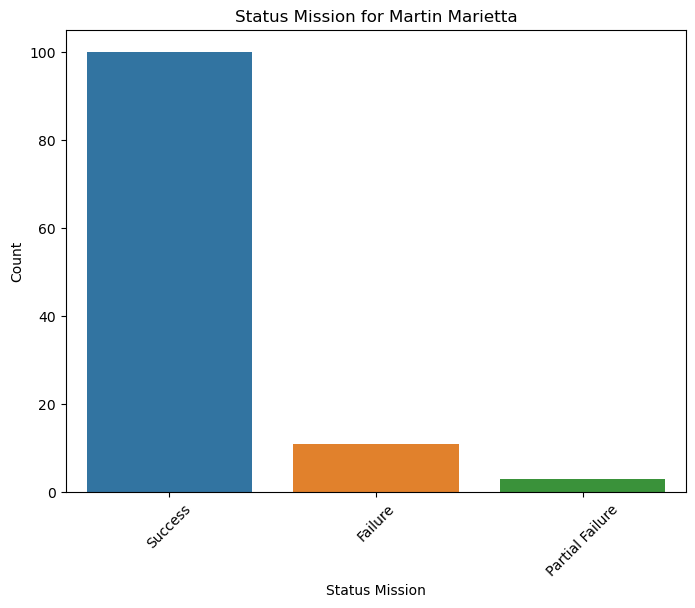

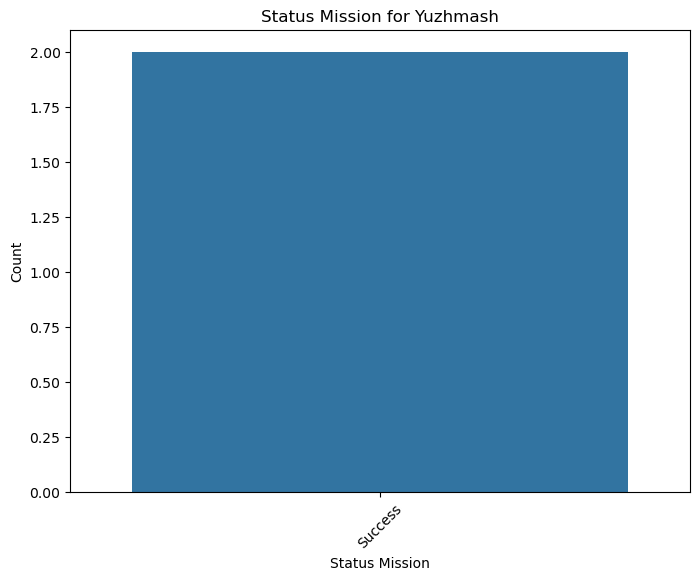

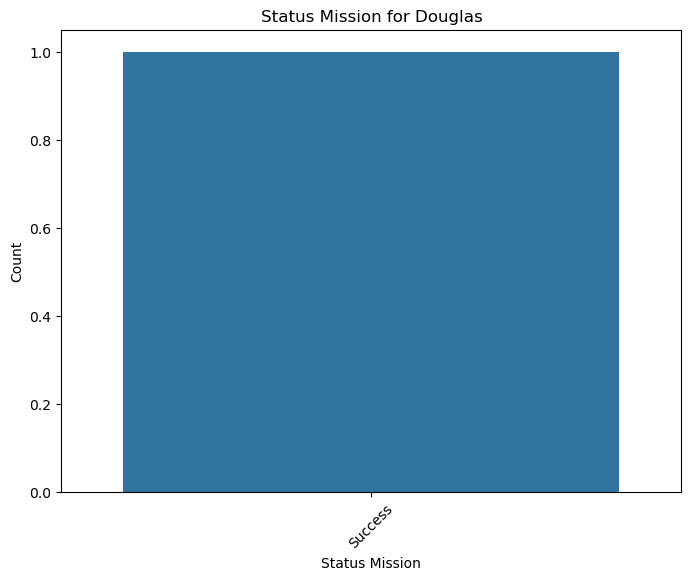

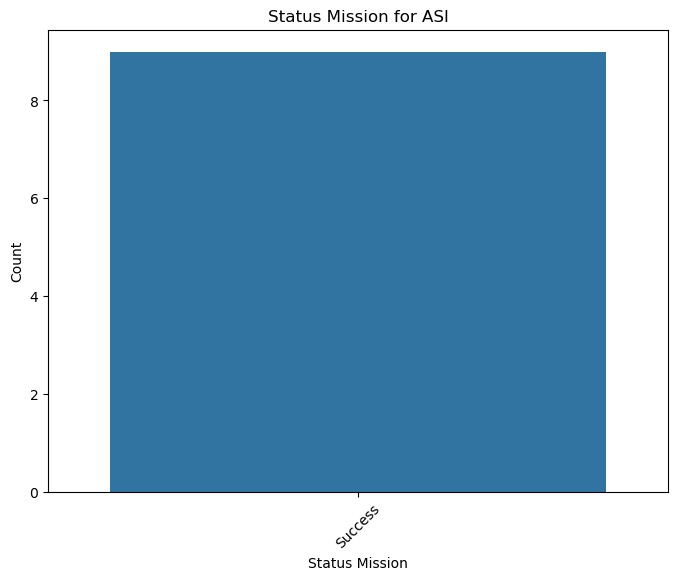

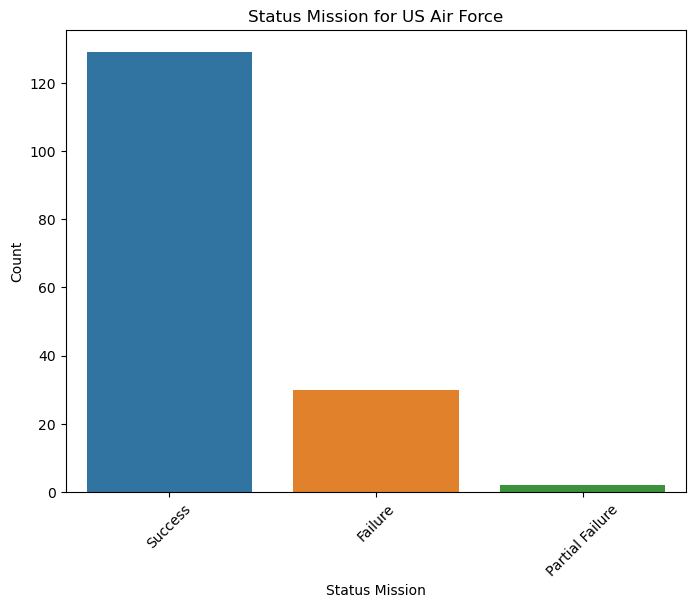

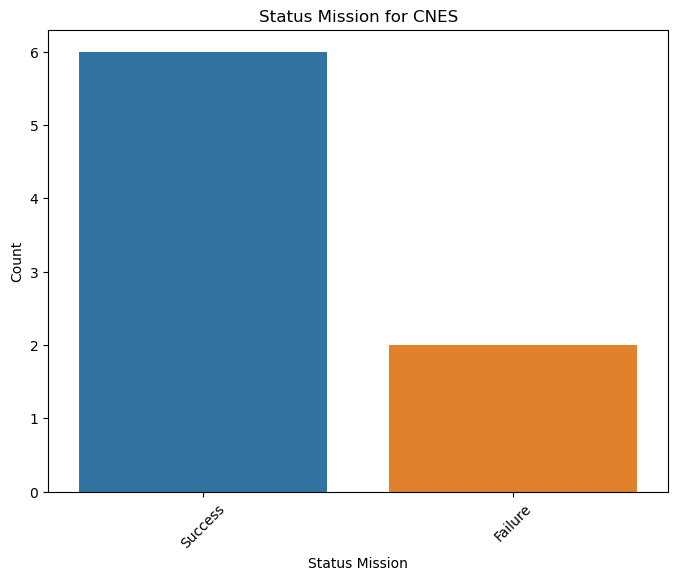

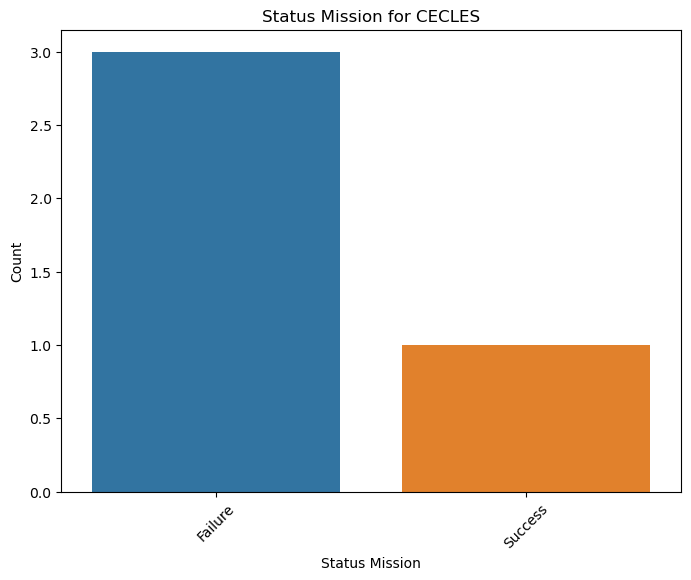

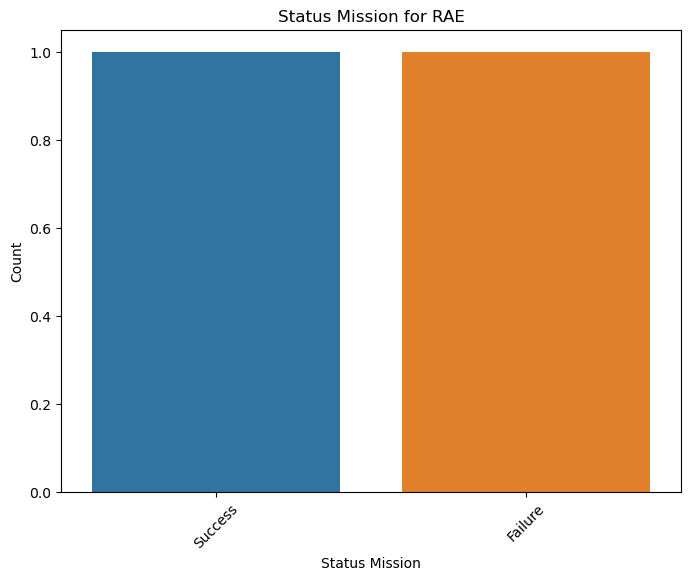

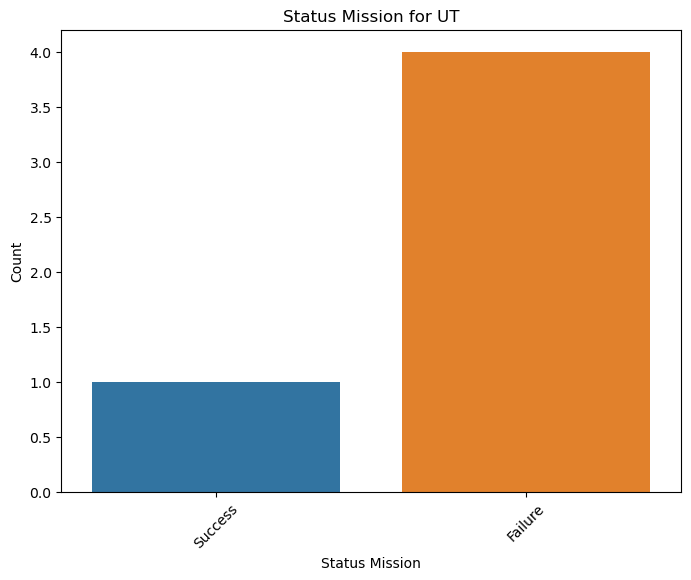

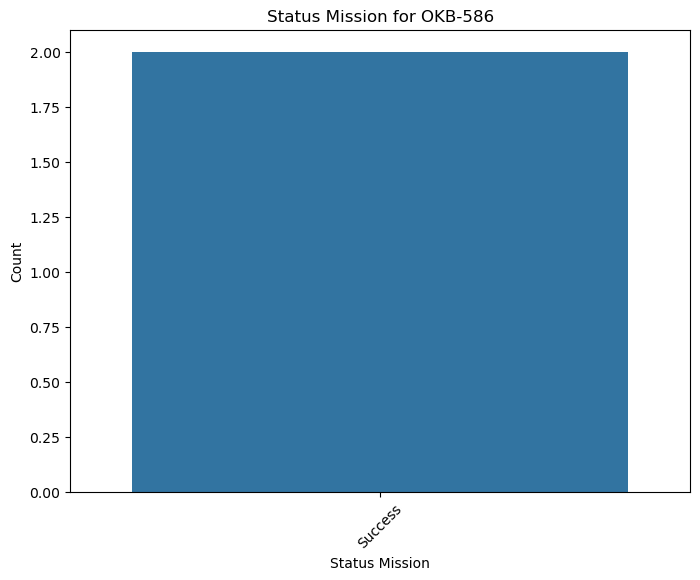

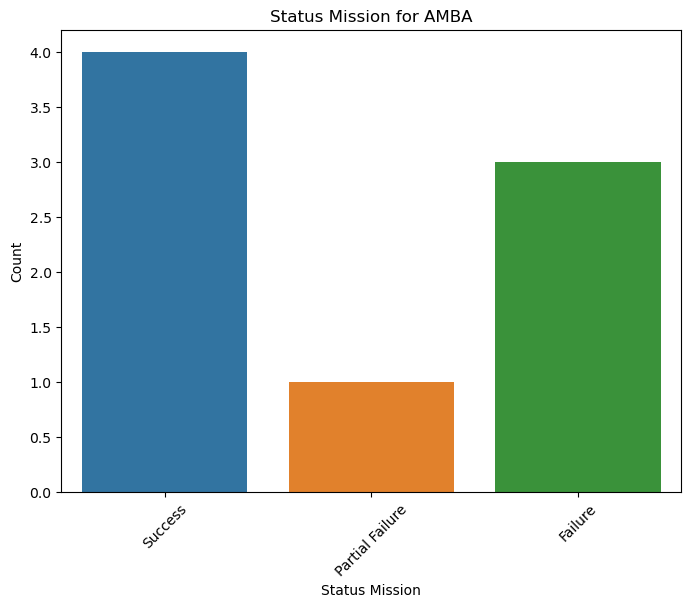

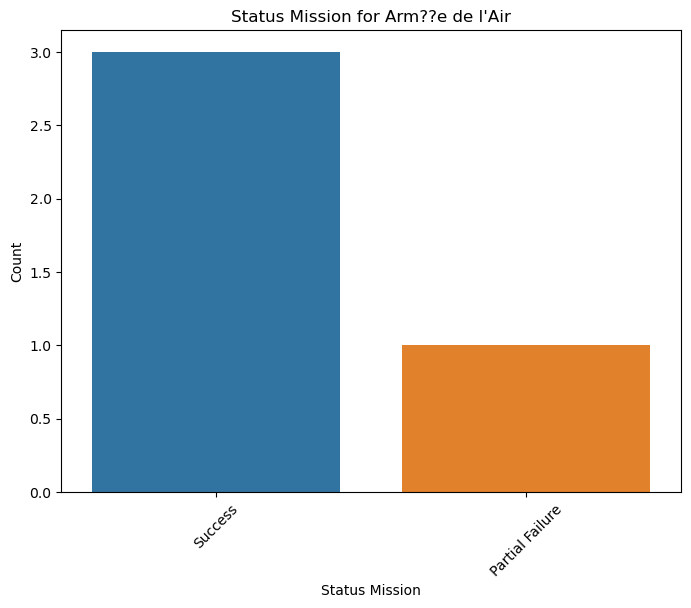

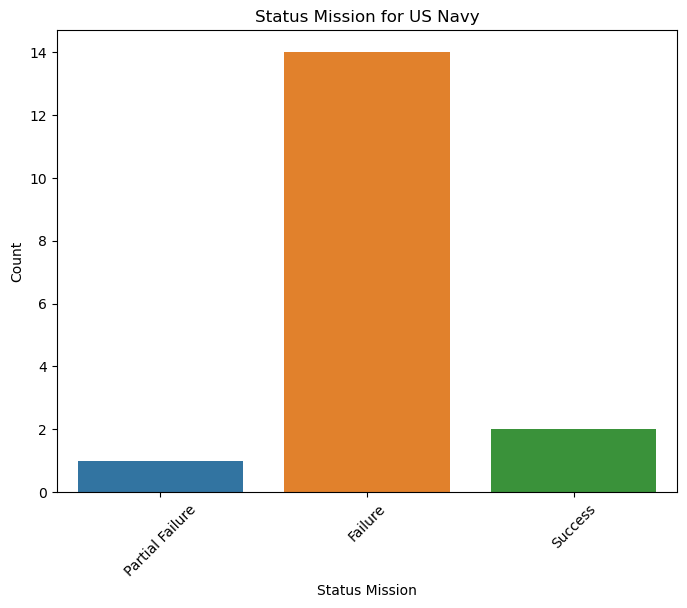

In [353]:
for company in df['Company Name'].unique():
    company_df = df[df['Company Name'] == company]
    
    # Graficamos el rendimiento para cada compañía
    plt.figure(figsize=(8, 6))
    sns.countplot(data=company_df, x='Status Mission')
    plt.title(f'Status Mission for {company}')
    plt.xlabel('Status Mission')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Con ayuda de estas gráficas podemos observar lo siguiente: 
* Existen compañías que a lo largo de su carrera en las misiones espaciales, solo han tenido casos de éxito, sin embargo en su mayoría solo han realizado un intento. Pero se rescata las labores de Blue Origin y ASI, quienes tienen un récord de invictos de 12 y 9 lanzamientos, respectivamente.
* También se observa que han sido los representantes de Rusia (URSS) quienes obtuvieron la mayor cantidad de éxitos en sus lanzamientos, con un total de 1614 casos de éxito.
* La compañía con más fallas fue la US Navy, con un total de 14 fallos de un total de 17 intentos.

Ahora, para analizar el rendimiento de los países que realizaron sus misiones espaciales, extraerémos el dato de cada país de la variable Location y la agregaremos como una nueva columna a nuestro df original para posteriormente poder realizar unas gráficas similares a las que hicimos para cada compañía y poder evaluar el rendimiento por países.

In [354]:
# Creamos una lista con las ubicaciones de cada lanzamiento y extraemos el dato de país que está representado 
# por la frase después de la última coma de cada registro de ubicación de lanzamiento.
locations = df['Location'].unique().tolist()
countries = [location.split(',')[-1].strip() for location in locations]

# Lo almacenamos en un DataFrame
df_country = pd.DataFrame({'Location': locations, 'Country': countries})
df_country.head()

,Location,Country
0,"LC-39A, Kennedy Space Center, Florida, USA",USA
1,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China
2,"Pad A, Boca Chica, Texas, USA",USA
3,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan
4,"SLC-41, Cape Canaveral AFS, Florida, USA",USA


In [355]:
# Lo agregamos en nuestro dataframe original.
df = df.assign(Country=df_country['Country'])
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


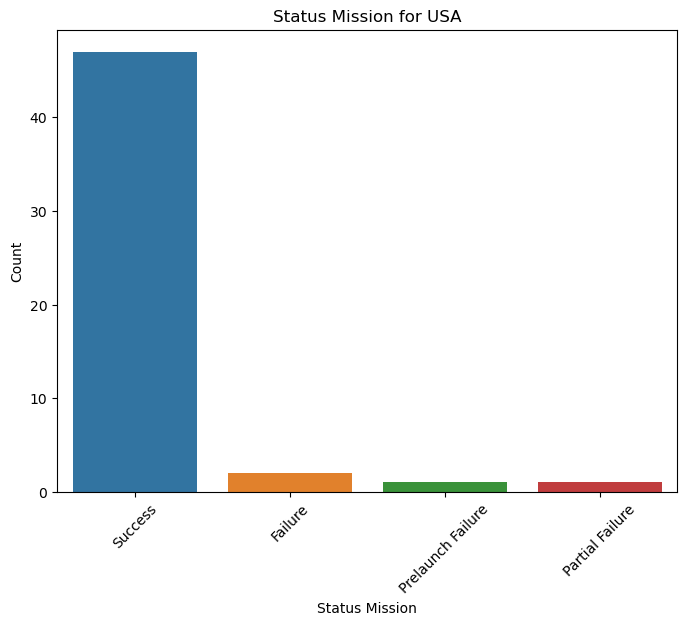

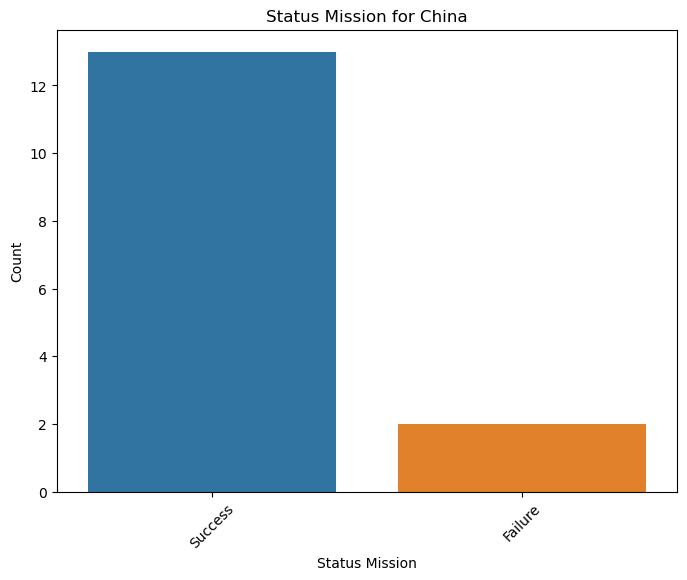

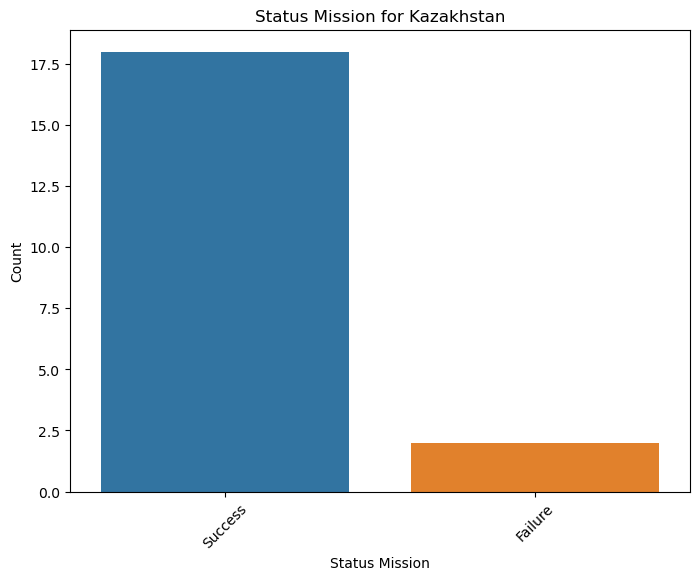

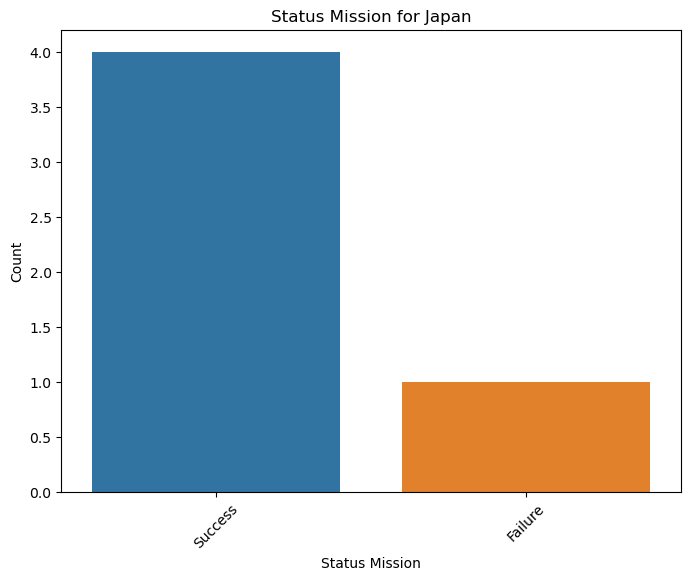

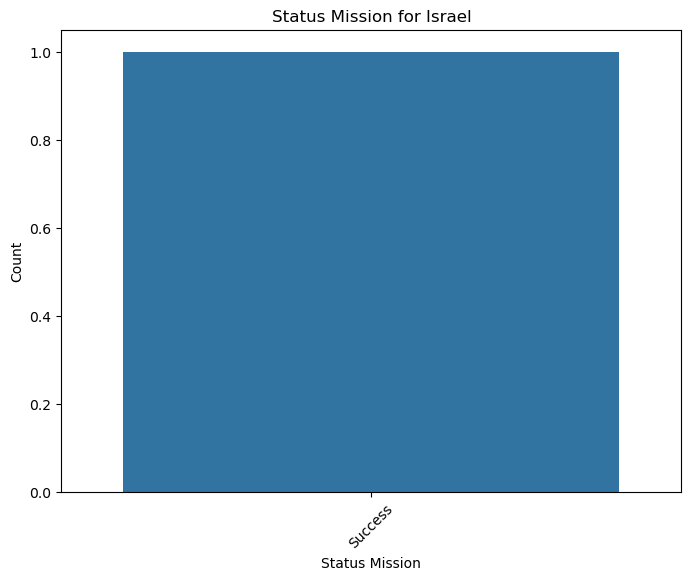

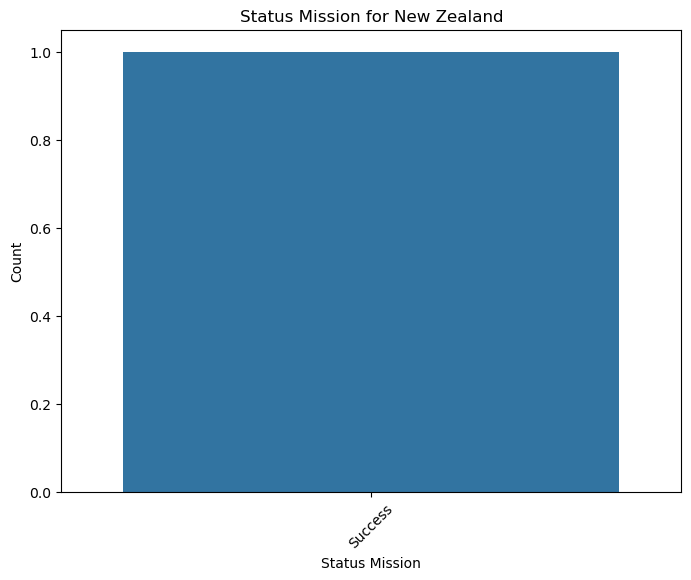

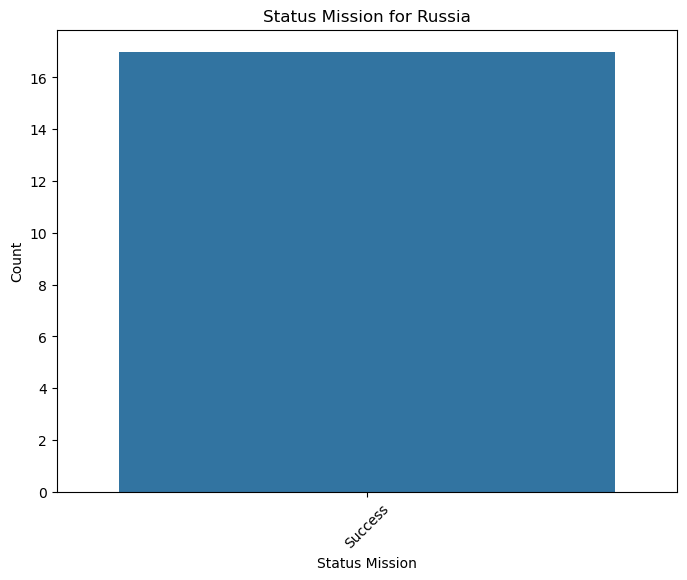

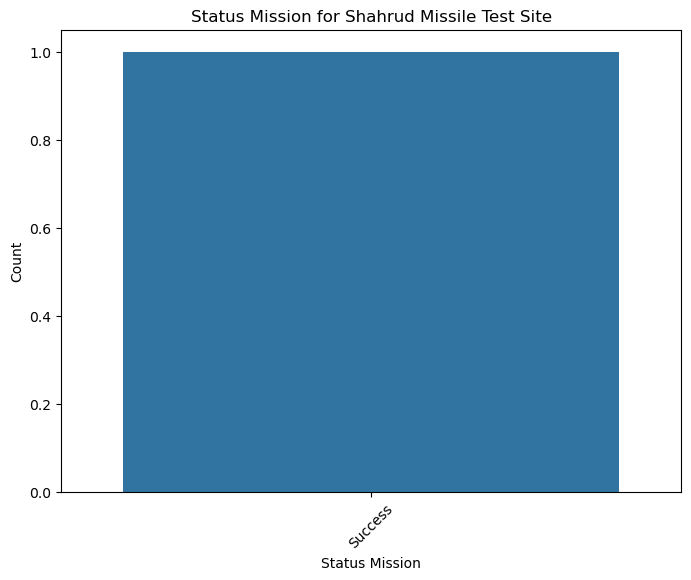

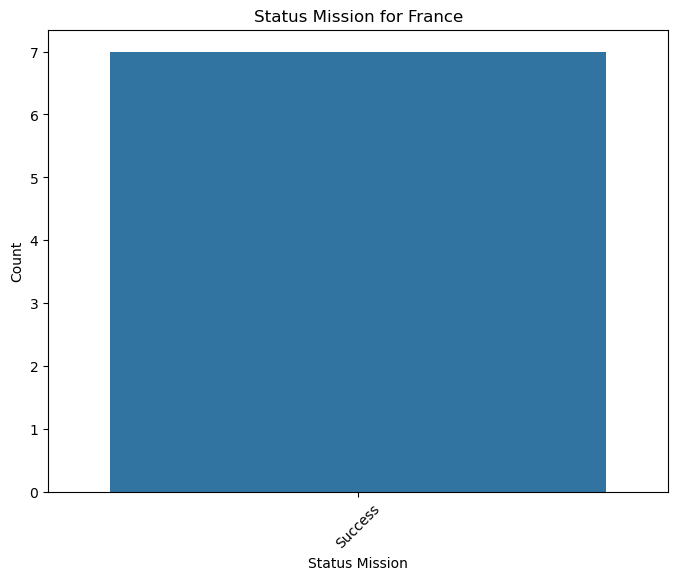

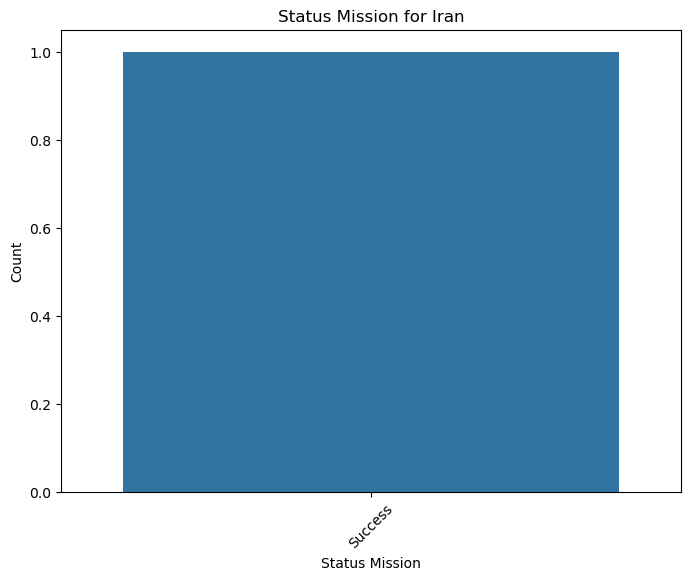

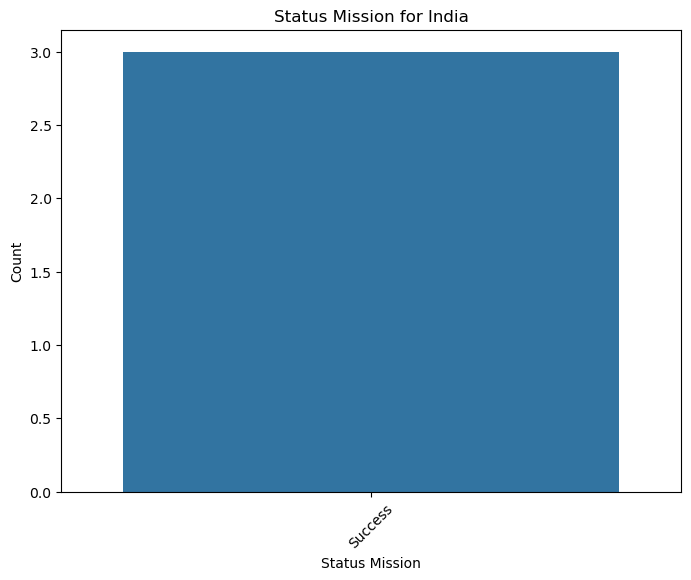

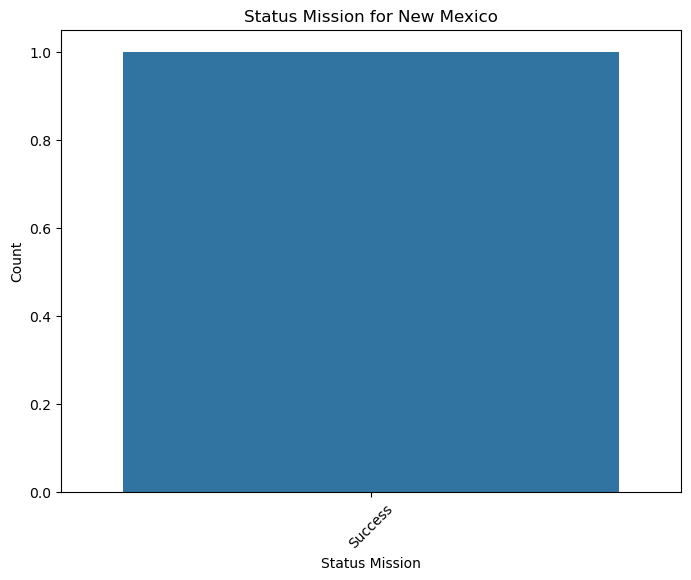

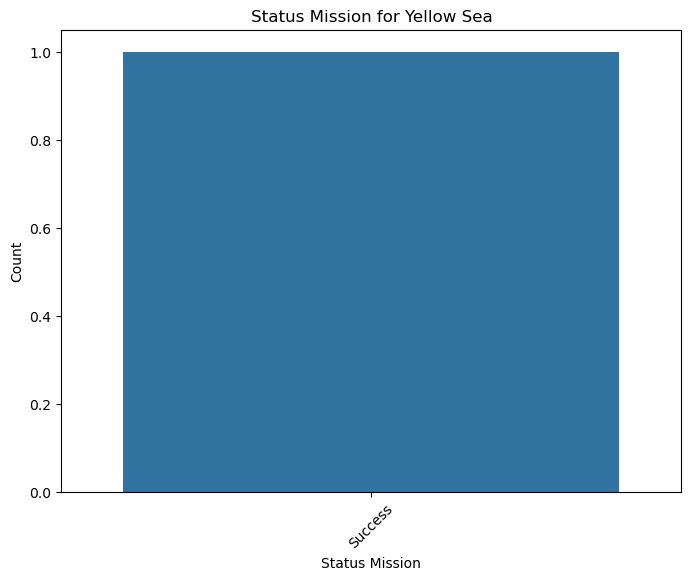

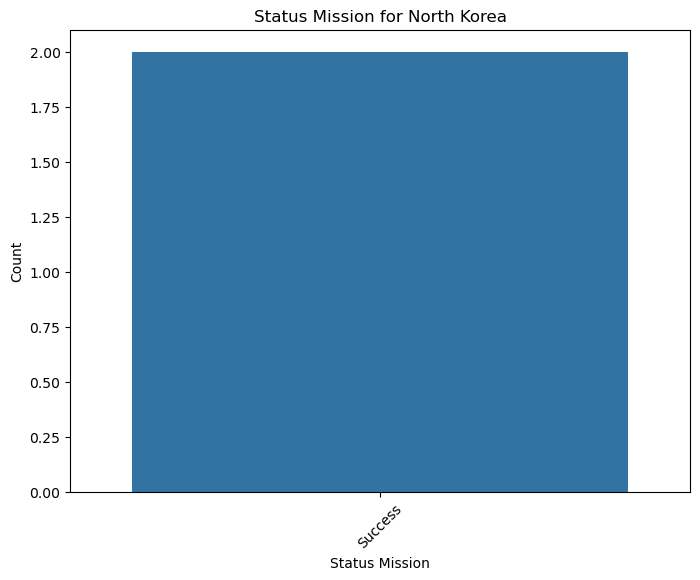

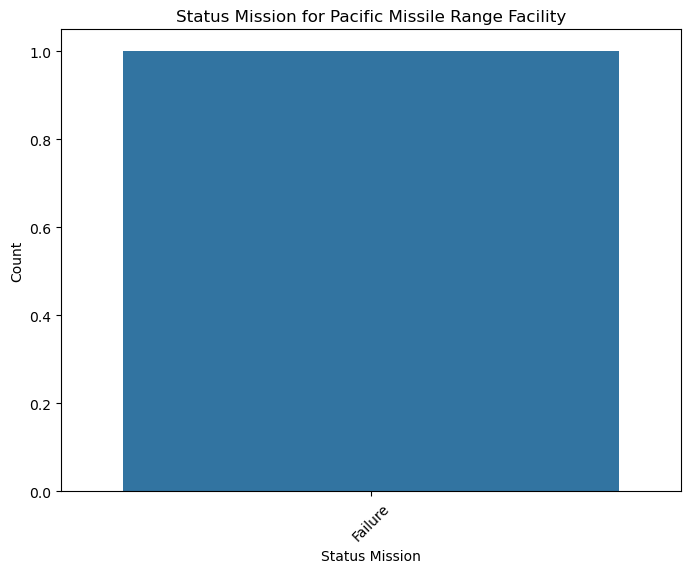

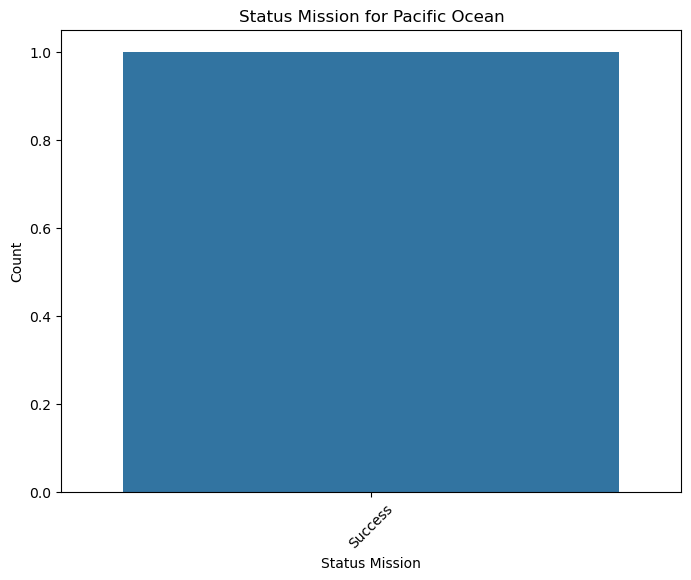

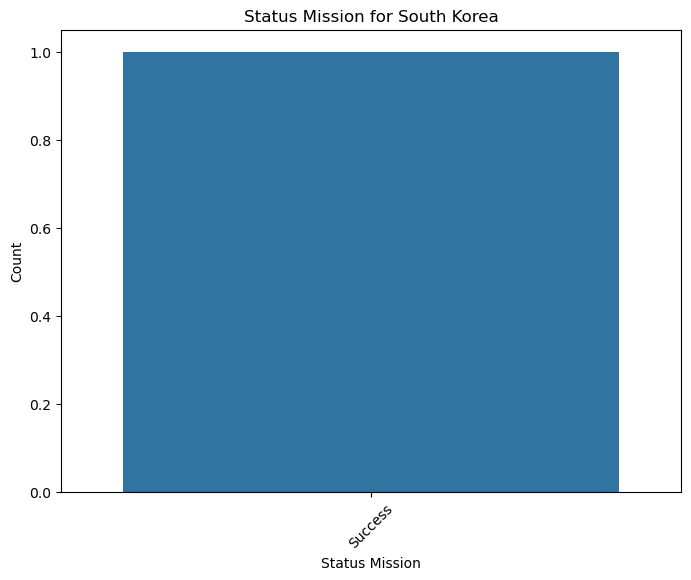

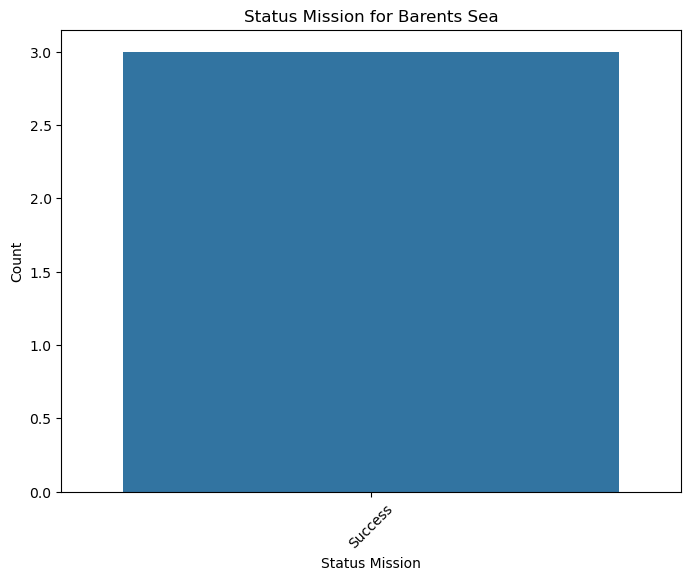

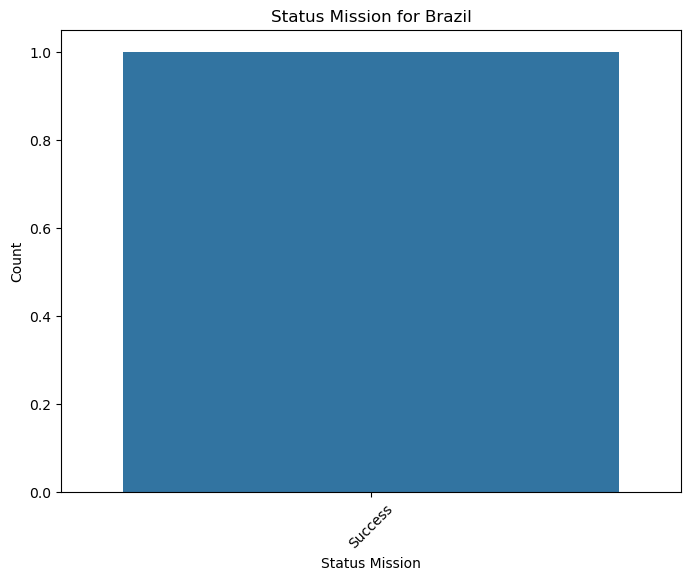

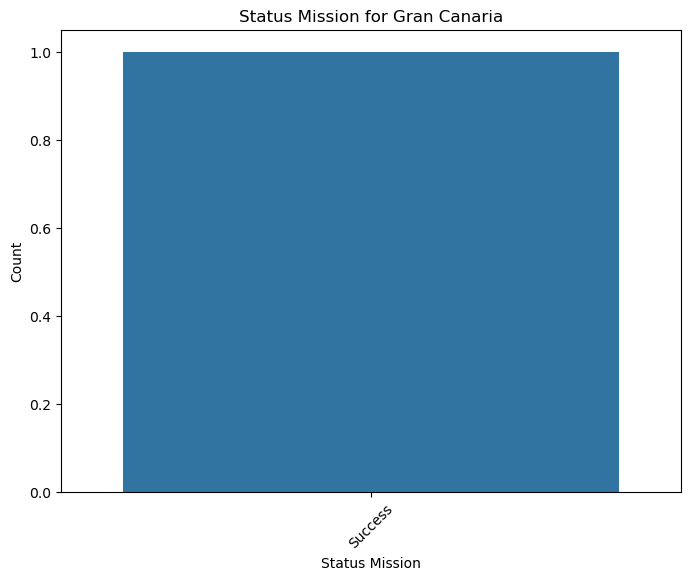

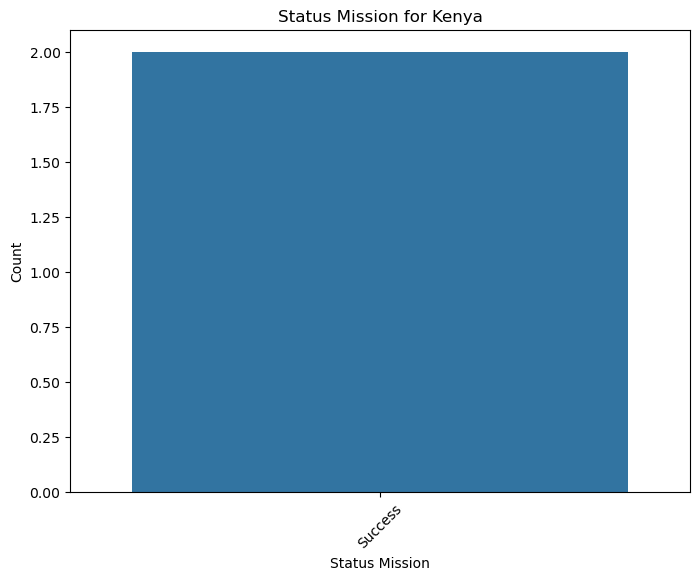

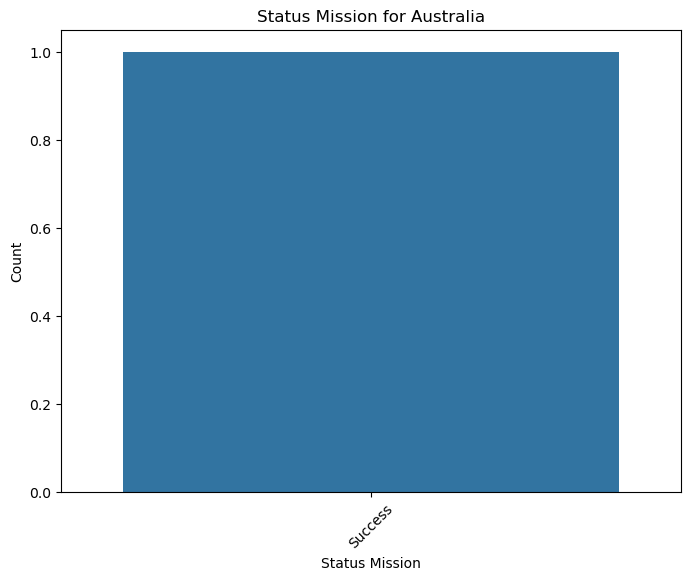

ValueError: min() arg is an empty sequence

<Figure size 800x600 with 0 Axes>

In [356]:
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    
    # Graficamos el rendimiento para cada país
    plt.figure(figsize=(8, 6))
    sns.countplot(data=country_df, x='Status Mission')
    plt.title(f'Status Mission for {country}')
    plt.xlabel('Status Mission')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [368]:
df.loc[(df['Company Name']=='RVSN USSR') & (df['Status Mission']=='Success')]

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
1299,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1998-08-12 12:53:00+00:00,Molniya-M /Block ML | Molniya-1 n†­133,StatusRetired,NaN,Success,NaN
1427,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1996-08-29 05:22:00+00:00,"Molniya-M /Block SO-L | Interbol 2, Magion5 & ...",StatusRetired,NaN,Success,NaN
1497,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1995-08-02 23:59:00+00:00,Molniya-M /Block SO-L | Interbol 1 & Magion 4,StatusRetired,NaN,Success,NaN
1689,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",1992-07-13 17:41:00+00:00,Tsyklon-3 | Cosmos 2197 to 2202,StatusRetired,NaN,Success,NaN
1691,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1992-07-08 09:53:00+00:00,Molniya-M /Block 2BL | Cosmos 2196,StatusRetired,NaN,Success,NaN
...,...,...,...,...,...,...,...,...
4276,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1959-10-04 00:43:00+00:00,Vostok | Luna-3,StatusRetired,NaN,Success,NaN
4279,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1959-09-12 06:39:00+00:00,Vostok | Luna-2,StatusRetired,NaN,Success,NaN
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,NaN
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,NaN


Al evaluar los rendimientos por país observamos que no todos las compañías pertenecientes a un país realizan los lanzamientos en su propio país de origen. Como por ejemolo la RVSN USSR, no solo realiza sus lanzamientos en territorio ruso, sino que también ha tenido lanzamientos desde Kazakhstan.

Por lo tanto, no sería lo suficientemente transparente realizar una proyección en cuanto al país de lanzamiento y sería mucho más significativo un resultado obtenido por la compañía que realizó el lanzamiento.


En las líneas anteriores ya se dió respuesta a las partes 3 y 4 de las preguntas, ahora procederemos con las conclusiones o insights principales obtenidos del EDA realizado al dataset de misiones espaciales.


### Conclusiones:
* Los principales países en el rubro de las misiones espaciales son Rusia, Estados Unidos y China.
* El país que también está danod de qué hablar y aumentando su competencia en este rubro es Francia, teniendo como principal representante a Arianespace.
* El costo promedio de las misiones espaciales está cerca a los 62 millones de dólares.
* Existe una reducción significativa en los costos de las misiones espaciales, las cuales se deben principalmente a los avances tecnológicos que permiten a las compañías participar en misiones espaciales con menor inversión.
* Dentro de los principales patrones descubiertos es que los costos por misión espacial han ido disminuyendo y lo seguirán haciendo, con la ayuda de los nuevos descubrimientos en avances tecnológicos.
* Otro patrón descubierto es que con el pasar del tiempo, las diferentes compañías del rubro han disminuído su cantidad de intentos fallidos y es más probable que al realizar una misión espacial tengan éxito en la etapa de lanzamiento.
* Se sugiere evaluar tecnologías alternativas de propulsión para que las misiones espaciales sean más eficientes, con alternativas como la propulsión plasma, la propulsión solar o la propulsión nuclear.
* También se sugiere evaluar las tecnologías de soporte vital que permiten desarrollar la sostenibilidad en las misiones de larga duración, como la generación de alimentos, el reciclaje de aire y agua, y la protección contra la radiación.
* En base a los resultados obtenidos se propone que para una compañía que busca incursionar en el rubro de las misiones espaciales, apoye sus ejecuciones en los datos e ingenierías de los países de Estados Unidos, China, Rusia y Francia, ya que son ellos los que en resultados más actuales han tenido mejores rendimientos, con diferentes de sus compañías principales, entre las cuales se encuentran Spacex, CASC, VKS RF y Arianespace